<a href="https://colab.research.google.com/github/chaehyeon119/DataScience/blob/main/COVID_19_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0622(화)

COVID-19 데이터 링크<br>
http://www.kaggle.com/euclidsoft

In [53]:
# 한글 깨짐 방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


COVID-19 환자 데이터 준비하기

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [55]:
#판다스 활용하기
df_patient = pd.read_csv('PatientInfo.csv')

1. COVID-19 환자 데이터 전처리

* 데이터 로드 잘 됐는지 확인하기

In [56]:
df_patient.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [57]:
df_patient.tail()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


*데이터가 어떤 식으로 구성되어 있는지 확인하기

In [58]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3388 non-null   int64  
 1   global_num          2276 non-null   float64
 2   gender              3311 non-null   object 
 3   birth_year          2927 non-null   float64
 4   age                 3304 non-null   object 
 5   country             3388 non-null   object 
 6   province            3388 non-null   object 
 7   city                3309 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      2620 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         822 non-null    float64
 12  contact_number      643 non-null    float64
 13  symptom_onset_date  481 non-null    object 
 14  confirmed_date      3385 non-null   object 
 15  released_date       1327 non-null   object 
 16  deceas

위 info를 보고 분석하자면
* gender,age > object로 되어 있음 ===> 변경해서 수치화 해야함
* 결측치 확인하기

데이터 결측치 확인하기<br>
isna().sum()

In [59]:

df_patient.isna().sum()

patient_id               0
global_num            1112
gender                  77
birth_year             461
age                     84
country                  0
province                 0
city                    79
disease               3370
infection_case         768
infection_order       3357
infected_by           2566
contact_number        2745
symptom_onset_date    2907
confirmed_date           3
released_date         2061
deceased_date         3326
state                    0
dtype: int64

*** 나이(age)<br>
-> 20s => 23 정확한 나이로 변경하기 <br>
-> 현재년도 - 태어난 년도(brith_year) <br><br>
1. Null(NaN) 데이터를 처리 (NaN 계산 불가) -> 0으로 채우자<br>
2. 나이 계산시, 0보다 큰 값은 (현재년도 - 태어난 년도)<br>
0보다 작으면 다시 NaN 채우기

In [60]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)

# 결측값을 대체해주는 함수는 fillna()함수 fillna(결측값을 대체할 값)

# NaN을 0.0으로 바꾸고 int(숫자형)으로 바꾼다

df_patient.tail()
#birht_yar이 0으로 바뀐 것을 확인할 수 있음

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3383,7000000009,9651.0,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3384,7000000010,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3385,7000000011,NaN,male,0,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,5.0,NaN,2020-04-03,NaN,NaN,isolated
3386,7000000012,NaN,female,0,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9.0,NaN,2020-04-03,NaN,NaN,isolated
3387,7000000013,NaN,female,0,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6.0,NaN,2020-04-14,NaN,NaN,isolated


In [61]:
# 0보다 큰 값은 그대로 사용하고, 0인 값은 NaN으로 변환
# ====> 나이 계산시 2021살이 나오는 것을 방지하기 위함
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val : val if val > 0 else np.nan)


# 위 코드 이해하기<br>
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val : val if val > 0 else np.nan)<br>

* 넘파이에서 제공하는 nan으로 바꿔주는 작업 np.nan
* map 함수 : 여러 개의 데이터를 한번에 다른 형태를 바꾸기 위해 사용한다.

* map이 하나씩 열어주면 lambda 함수가 데이터를 꺼내서 비교하고 리스트에 넣어줌
* val이라는 변수 하나 만들어서 if val > 0:
     val # 있는 값(birth_year) 그대로 남김
* np.nan으로 변경한 이유 : 결측치라도 다 다른 결측치 이므로 동일한 결측치로 바꾸기 위함
* np.nan으로 변경하면서 명확한 결측치로 통일 -> 오류 발생을 예방하기 위해 변경한 것




In [62]:
df_patient['age'] = 2021 - df_patient['birth_year']
df_patient.head()
# 2021- NaN = NaN으로 나옴  

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,57.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,34.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,57.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,30.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,29.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


##* None과 NaN의 차이점은?<br>
None은 null값을 가지므로 빈 셀<br>
Nan은 읽은 값이 숫자가 아님

2. 격리해제자(released) 데이터[state]

In [63]:
patient = df_patient

# 전처리한 df_patient를 살리면서 데이터 확인을 위해 잠시 patient 변수에 담음

In [12]:
#격리해제자 정보 담기
released = patient[patient.state == 'released']
released.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,57.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,34.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,57.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,30.0,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,29.0,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [13]:
released.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 3382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1886 non-null   int64  
 1   global_num          1220 non-null   float64
 2   gender              1867 non-null   object 
 3   birth_year          1606 non-null   float64
 4   age                 1606 non-null   float64
 5   country             1886 non-null   object 
 6   province            1886 non-null   object 
 7   city                1859 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1328 non-null   object 
 10  infection_order     29 non-null     float64
 11  infected_by         361 non-null    float64
 12  contact_number      455 non-null    float64
 13  symptom_onset_date  284 non-null    object 
 14  confirmed_date      1886 non-null   object 
 15  released_date       1314 non-null   object 
 16  deceas

격리해제자들의 연령대 분석

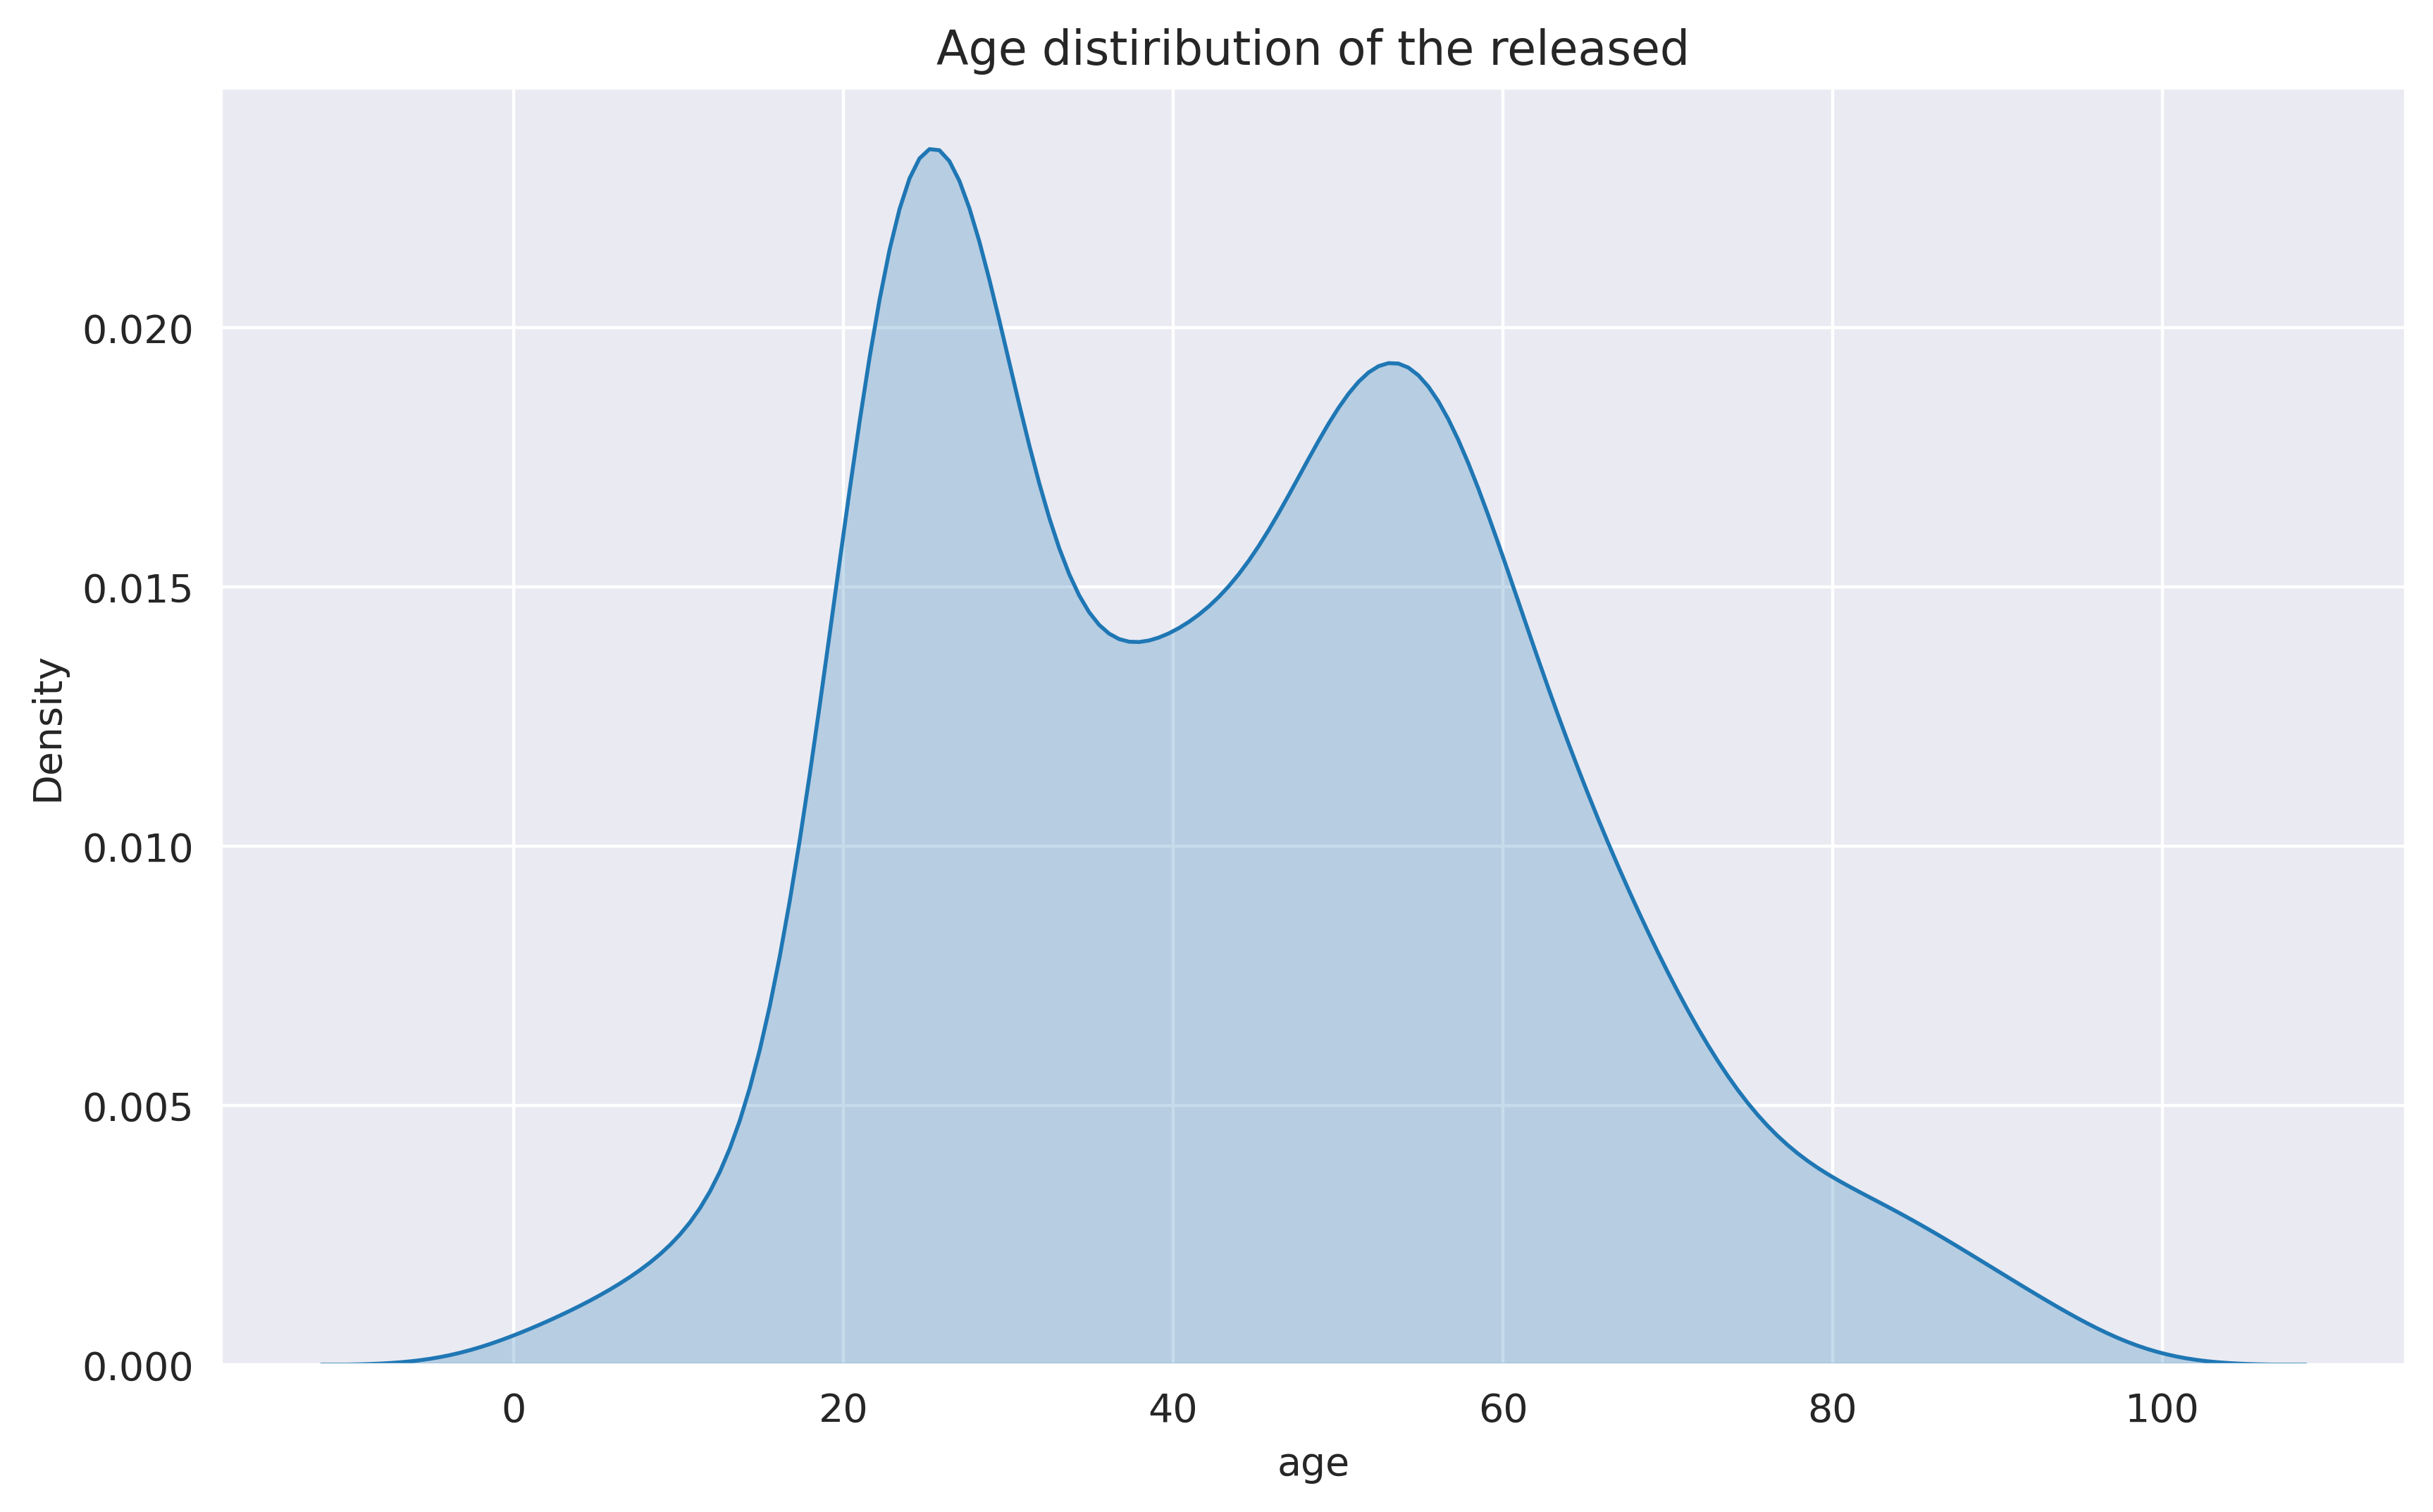

In [14]:
# 격리 해제자 연령대 분포 그래프 그리기

plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title('Age distiribution of the released')
sns.kdeplot(data=released['age'], shade=True)


# shade=True 그래프 안에 색 채우기
# data = (a) a 데이터의 값을 보여줌

3. 격리된(isolated) 환자 데이터

In [15]:
#격리된 환자의 정보 담기
isolated_state = patient[patient.state == 'isolated']
isolated_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 14 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1433 non-null   int64  
 1   global_num          997 non-null    float64
 2   gender              1375 non-null   object 
 3   birth_year          1257 non-null   float64
 4   age                 1257 non-null   float64
 5   country             1433 non-null   object 
 6   province            1433 non-null   object 
 7   city                1400 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1263 non-null   object 
 10  infection_order     2 non-null      float64
 11  infected_by         461 non-null    float64
 12  contact_number      184 non-null    float64
 13  symptom_onset_date  191 non-null    object 
 14  confirmed_date      1430 non-null   object 
 15  released_date       11 non-null     object 
 16  decea

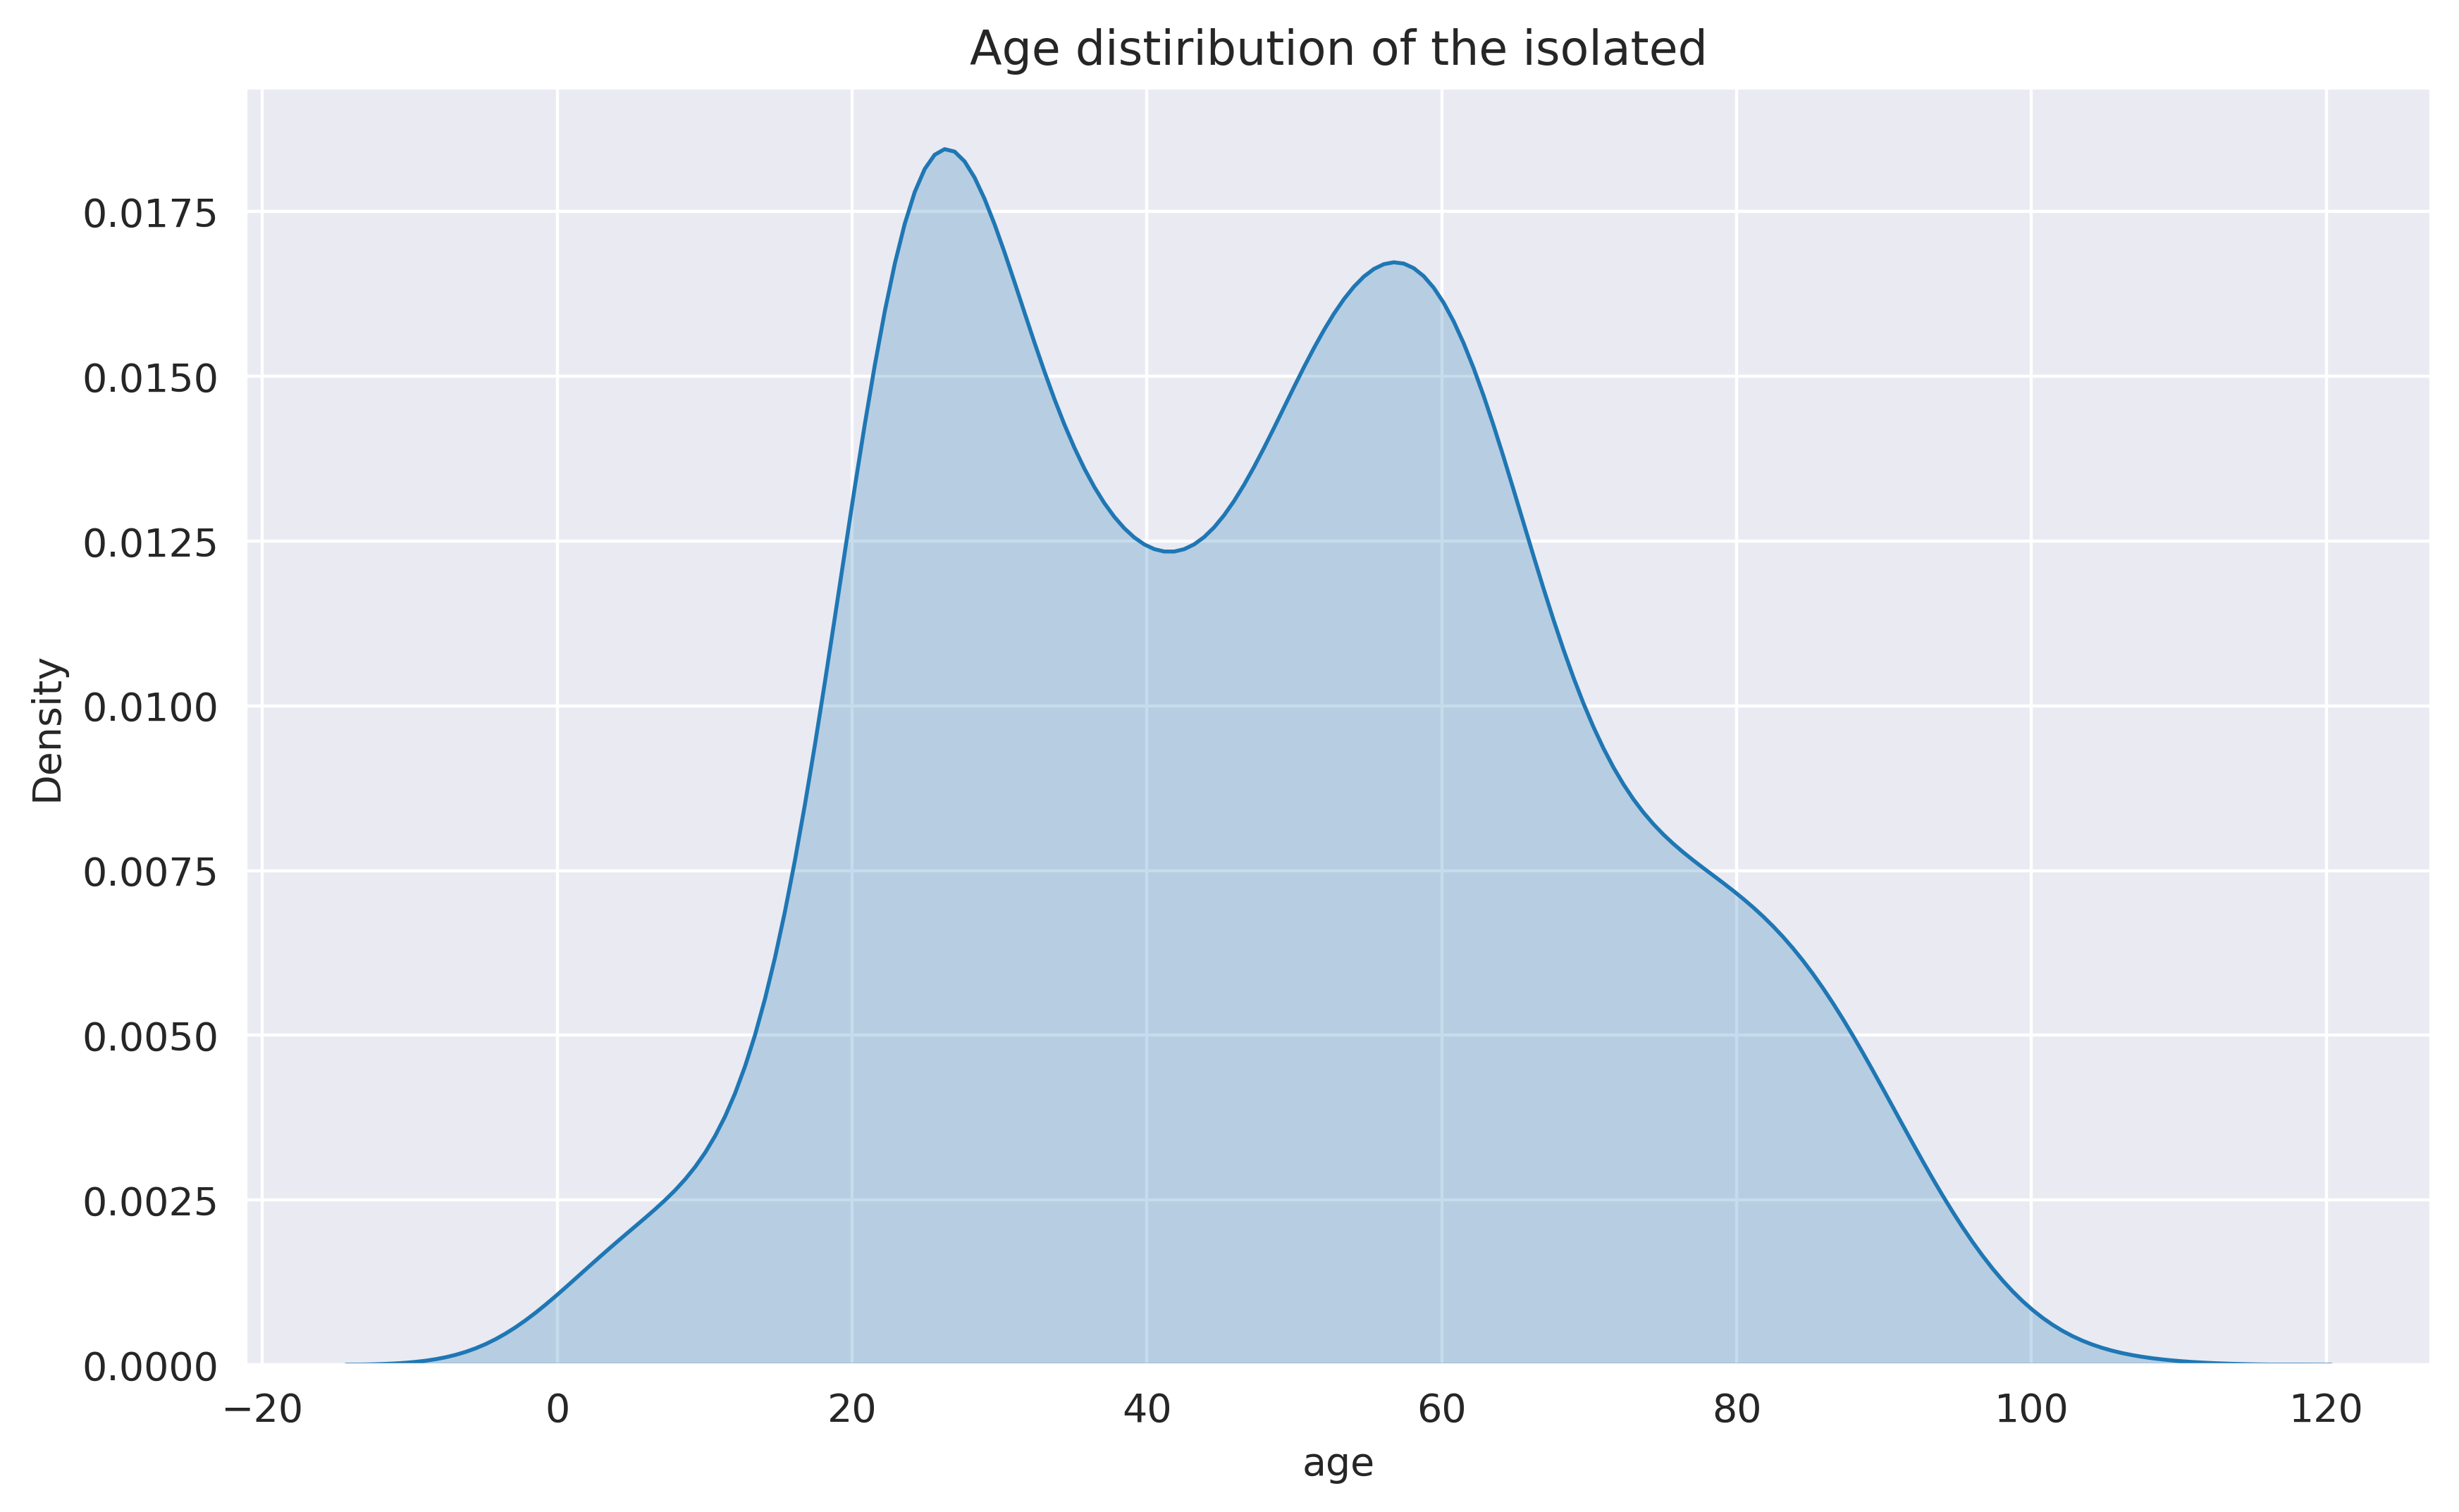

In [16]:
# 격리자 연령대 분포 그래프 그리기
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title('Age distiribution of the isolated')
sns.kdeplot(data=isolated_state['age'], shade=True)


4. 사망자(deceased) 데이터

In [50]:
# 사망자의 정보
dead = patient[patient.state == 'deceased']
dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 108 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          69 non-null     int64  
 1   global_num          59 non-null     float64
 2   gender              69 non-null     object 
 3   birth_year          64 non-null     float64
 4   age                 64 non-null     float64
 5   country             69 non-null     object 
 6   province            69 non-null     object 
 7   city                50 non-null     object 
 8   disease             18 non-null     object 
 9   infection_case      29 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      4 non-null      float64
 13  symptom_onset_date  6 non-null      object 
 14  confirmed_date      69 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

In [51]:
dead.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
108,1000000109,6773.0,male,1929.0,92.0,Korea,Seoul,etc,NaN,contact with patient,NaN,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased
284,1000000285,8602.0,male,1976.0,45.0,Korea,Seoul,Mapo-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,deceased
703,1100000071,NaN,male,1941.0,80.0,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,1.0,2020-02-28,2020-02-28,NaN,NaN,deceased
727,1100000095,NaN,female,1932.0,89.0,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased
729,1100000097,NaN,male,1947.0,74.0,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,11.0,2020-03-09,2020-03-13,NaN,NaN,deceased


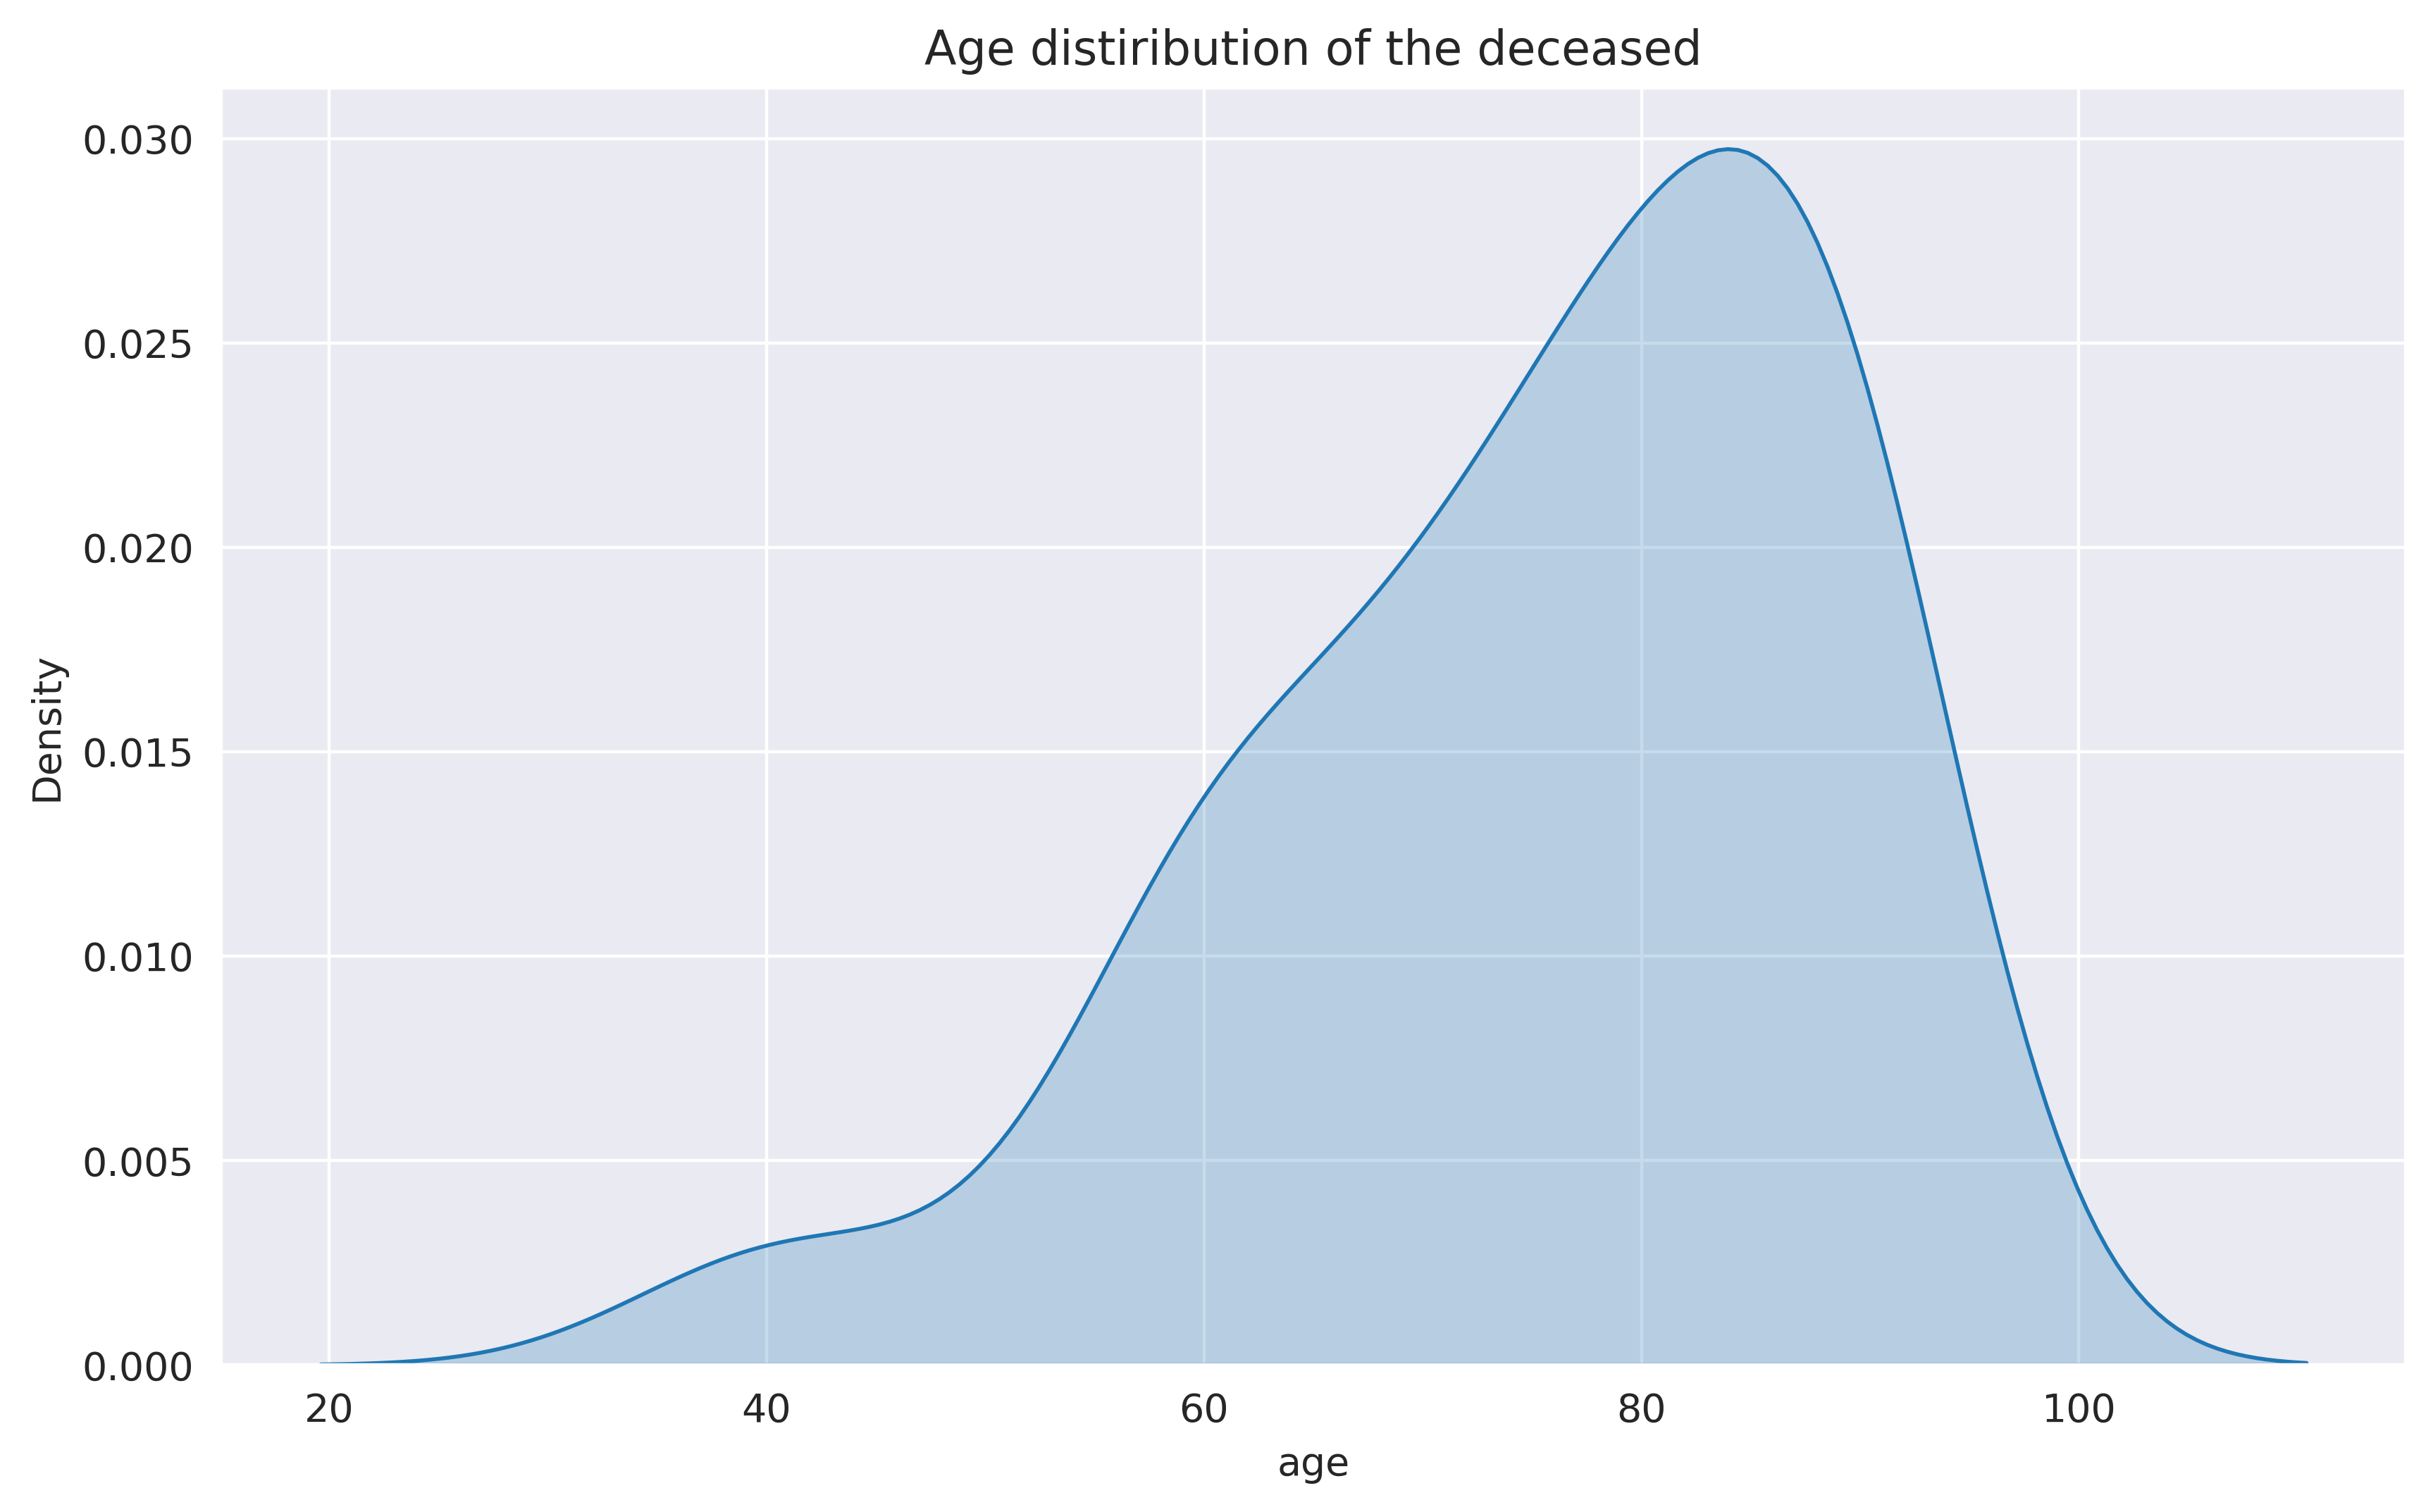

In [18]:
# 사망자 연령대 분포 그래프 그리기
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title('Age distiribution of the deceased')
sns.kdeplot(data= dead['age'], shade=True)

5. 사망자에 따른 성별(gender) 데이터

In [19]:
male_dead = dead[dead.gender == 'male']
female_dead = dead[dead.gender == 'female']

In [20]:
male_dead.info() # 44명

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 108 to 3154
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          44 non-null     int64  
 1   global_num          39 non-null     float64
 2   gender              44 non-null     object 
 3   birth_year          42 non-null     float64
 4   age                 42 non-null     float64
 5   country             44 non-null     object 
 6   province            44 non-null     object 
 7   city                31 non-null     object 
 8   disease             13 non-null     object 
 9   infection_case      20 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  5 non-null      object 
 14  confirmed_date      44 non-null     object 
 15  released_date       0 non-null      object 
 16  deceas

In [21]:
female_dead.info() # 25명

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 727 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          25 non-null     int64  
 1   global_num          20 non-null     float64
 2   gender              25 non-null     object 
 3   birth_year          22 non-null     float64
 4   age                 22 non-null     float64
 5   country             25 non-null     object 
 6   province            25 non-null     object 
 7   city                19 non-null     object 
 8   disease             5 non-null      object 
 9   infection_case      9 non-null      object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  1 non-null      object 
 14  confirmed_date      25 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

성별에 따른 사망자의 연령분포

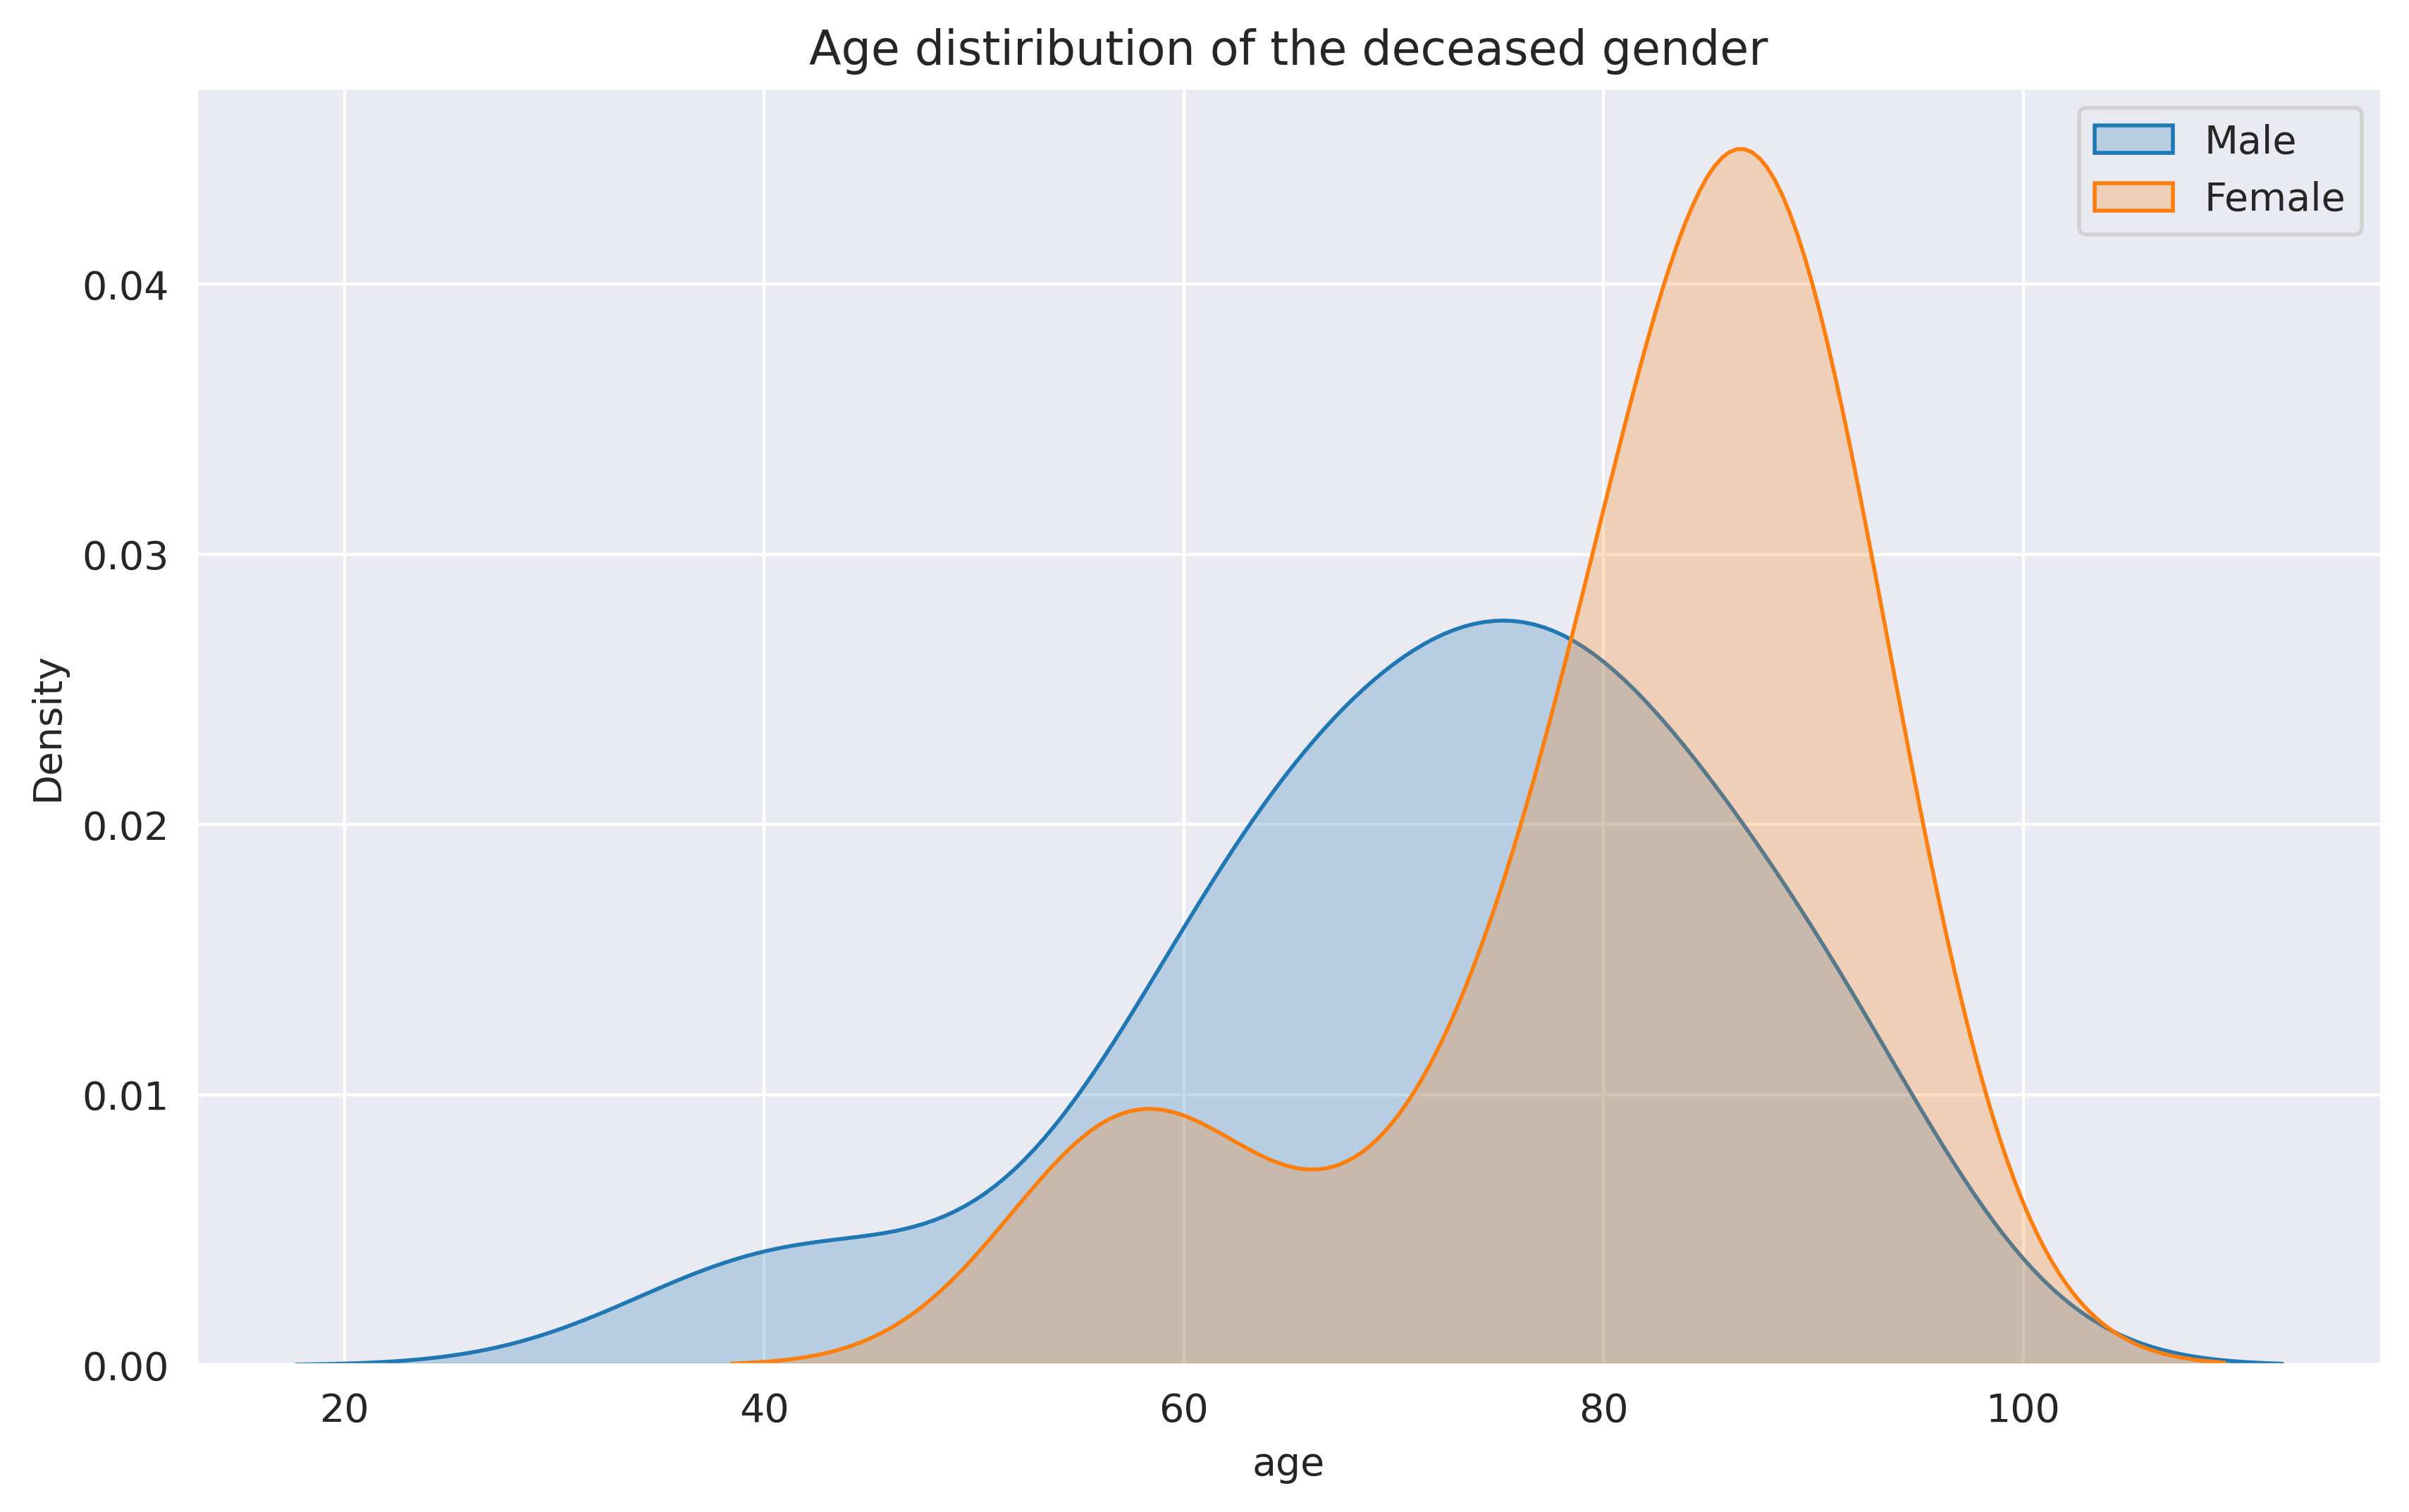

In [22]:
# 성별에 따른 사망자 연령 분포 그래프 그리기
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title('Age distiribution of the deceased gender')
sns.kdeplot(data= male_dead['age'], label ='Male', shade=True)
sns.kdeplot(data= female_dead['age'],label = 'Female', shade=True)
plt.legend() # 라벨이 2개이상이면 legend() 넣기

KDE: Kernel Desity Estimator 추가한 distplot()<br>
==> 최솟값, 최댓값을 볼 수 있게 해줌

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


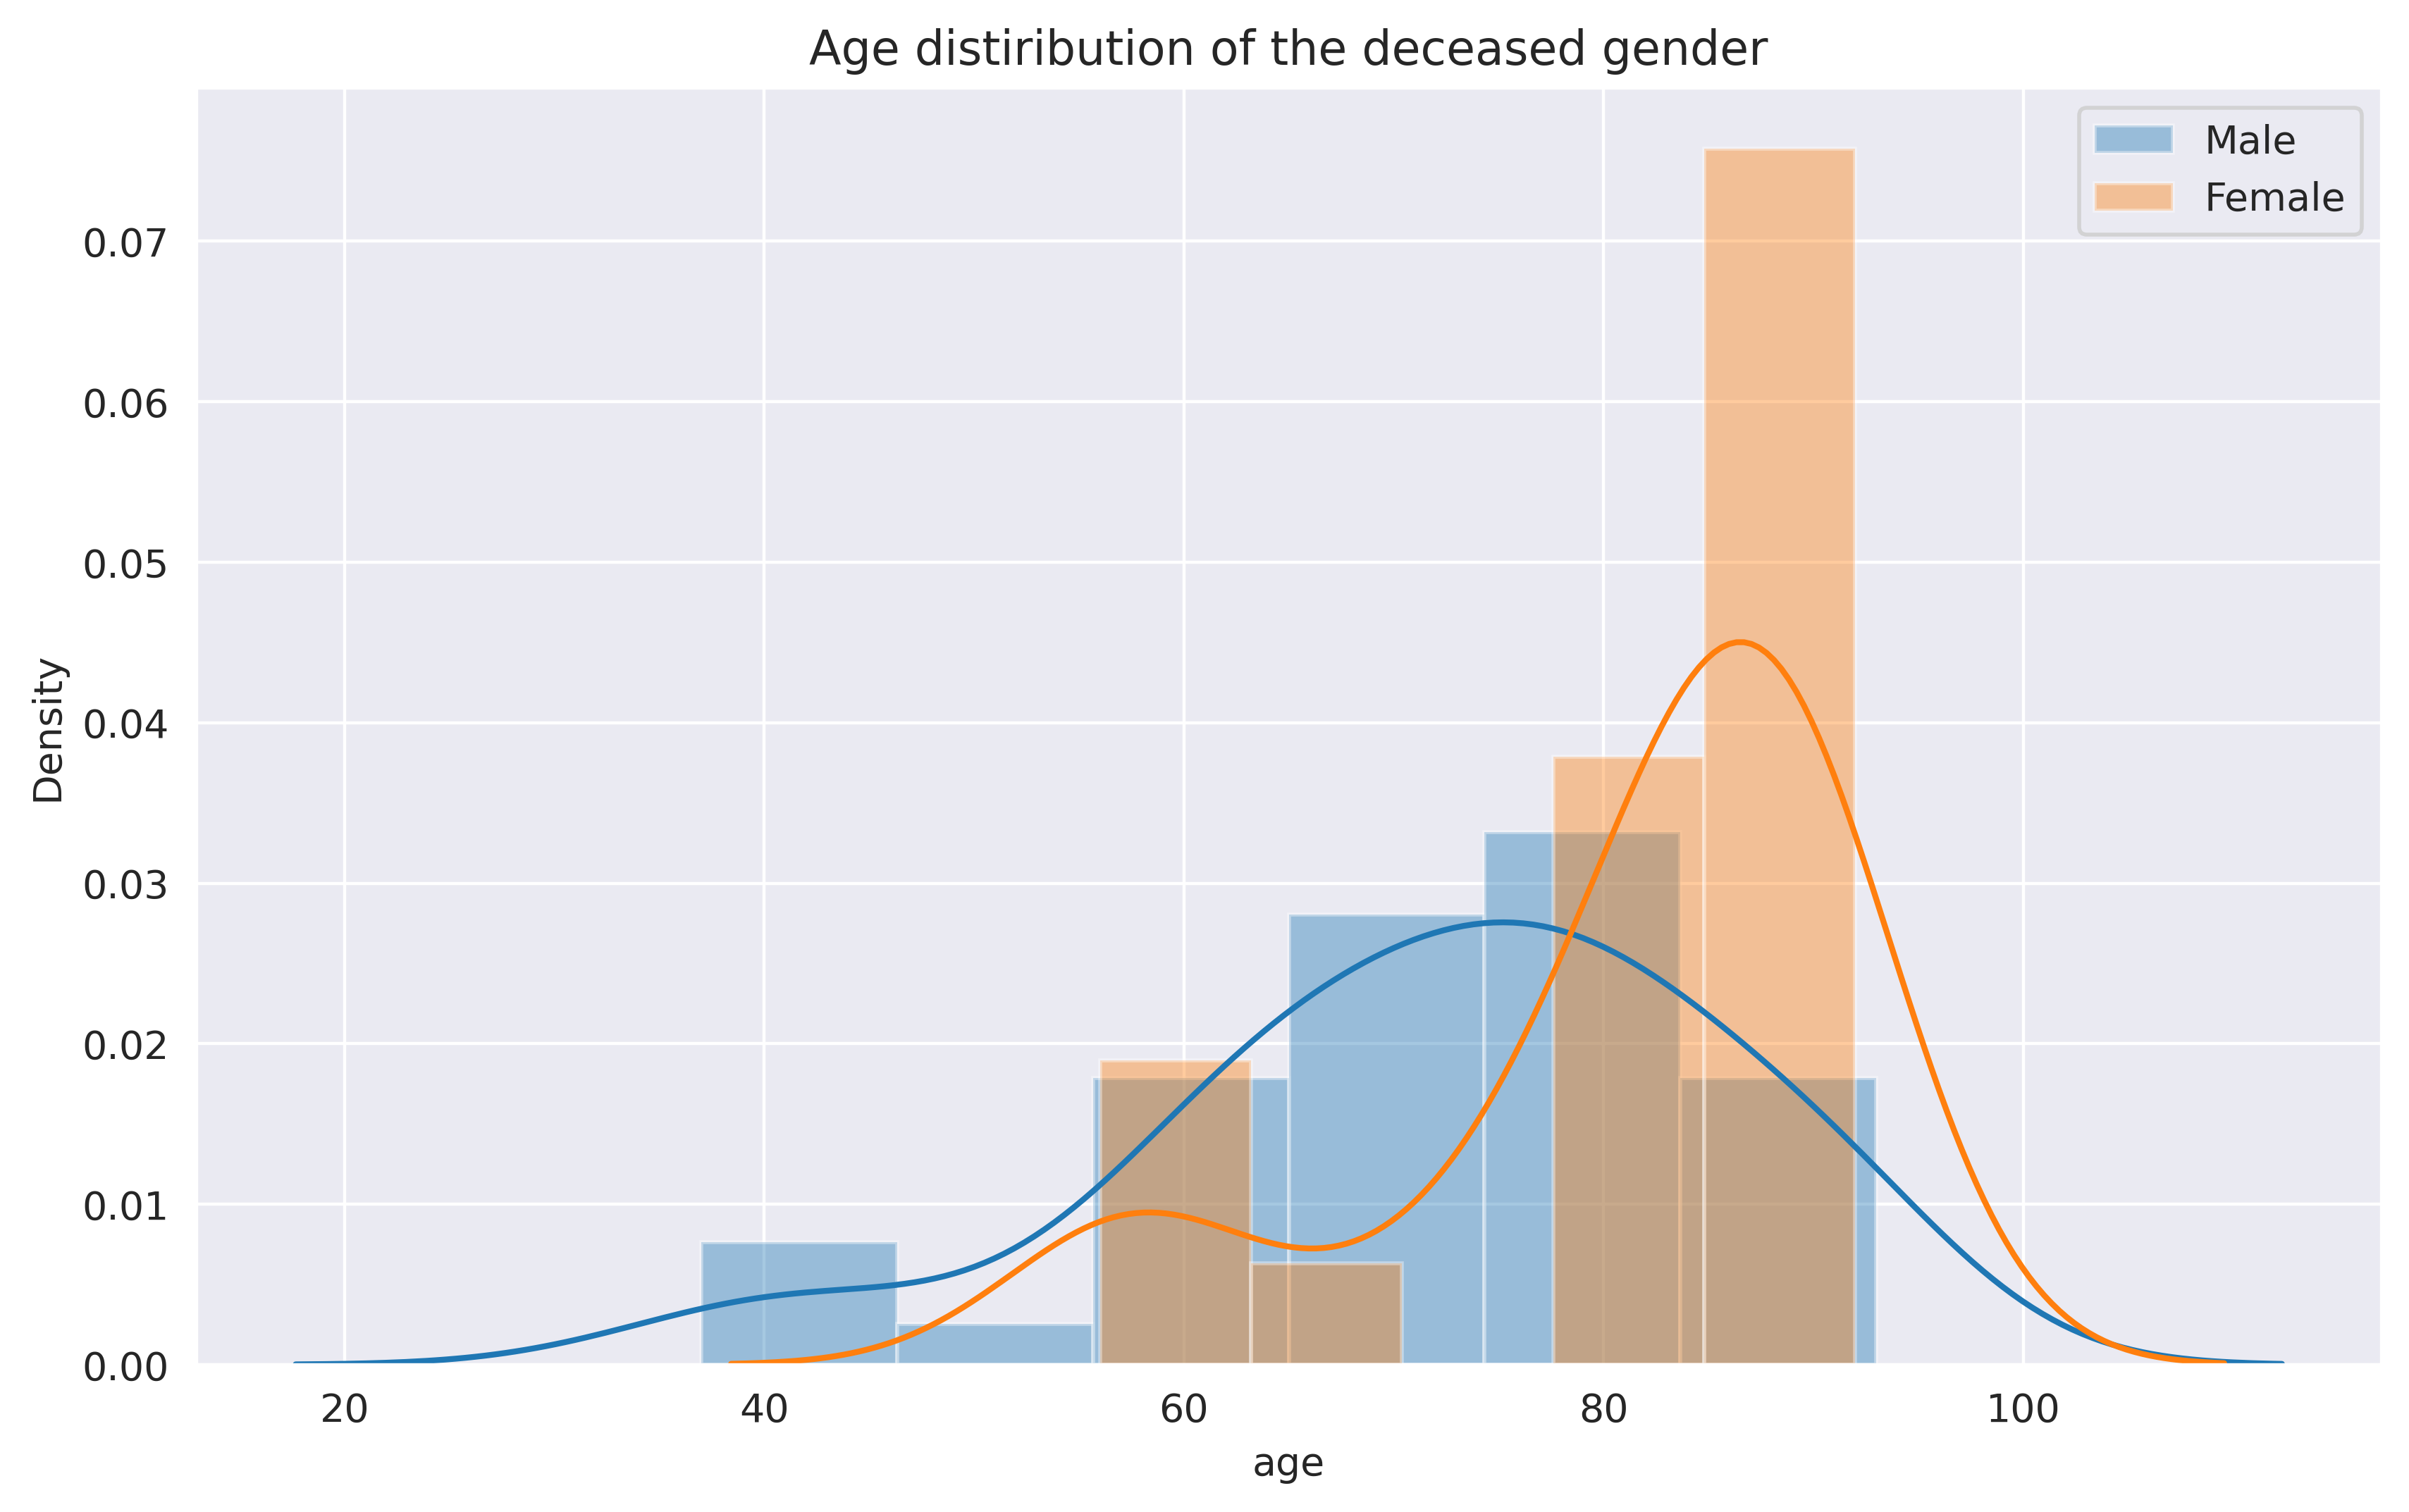

In [23]:
# 성별에 따른 사망자 연령 분포 그래프 그리기
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title('Age distiribution of the deceased gender')
sns.distplot(a= male_dead['age'], label ='Male', kde=True)
sns.distplot(a= female_dead['age'],label = 'Female', kde=True)
plt.legend() # 라벨이 2개이상이면 legend() 넣기

#모든 데이터 한눈에 그려서 양상 확인하기

사망자 성별 비교 -> 바차트, 파이차트 -> 분포

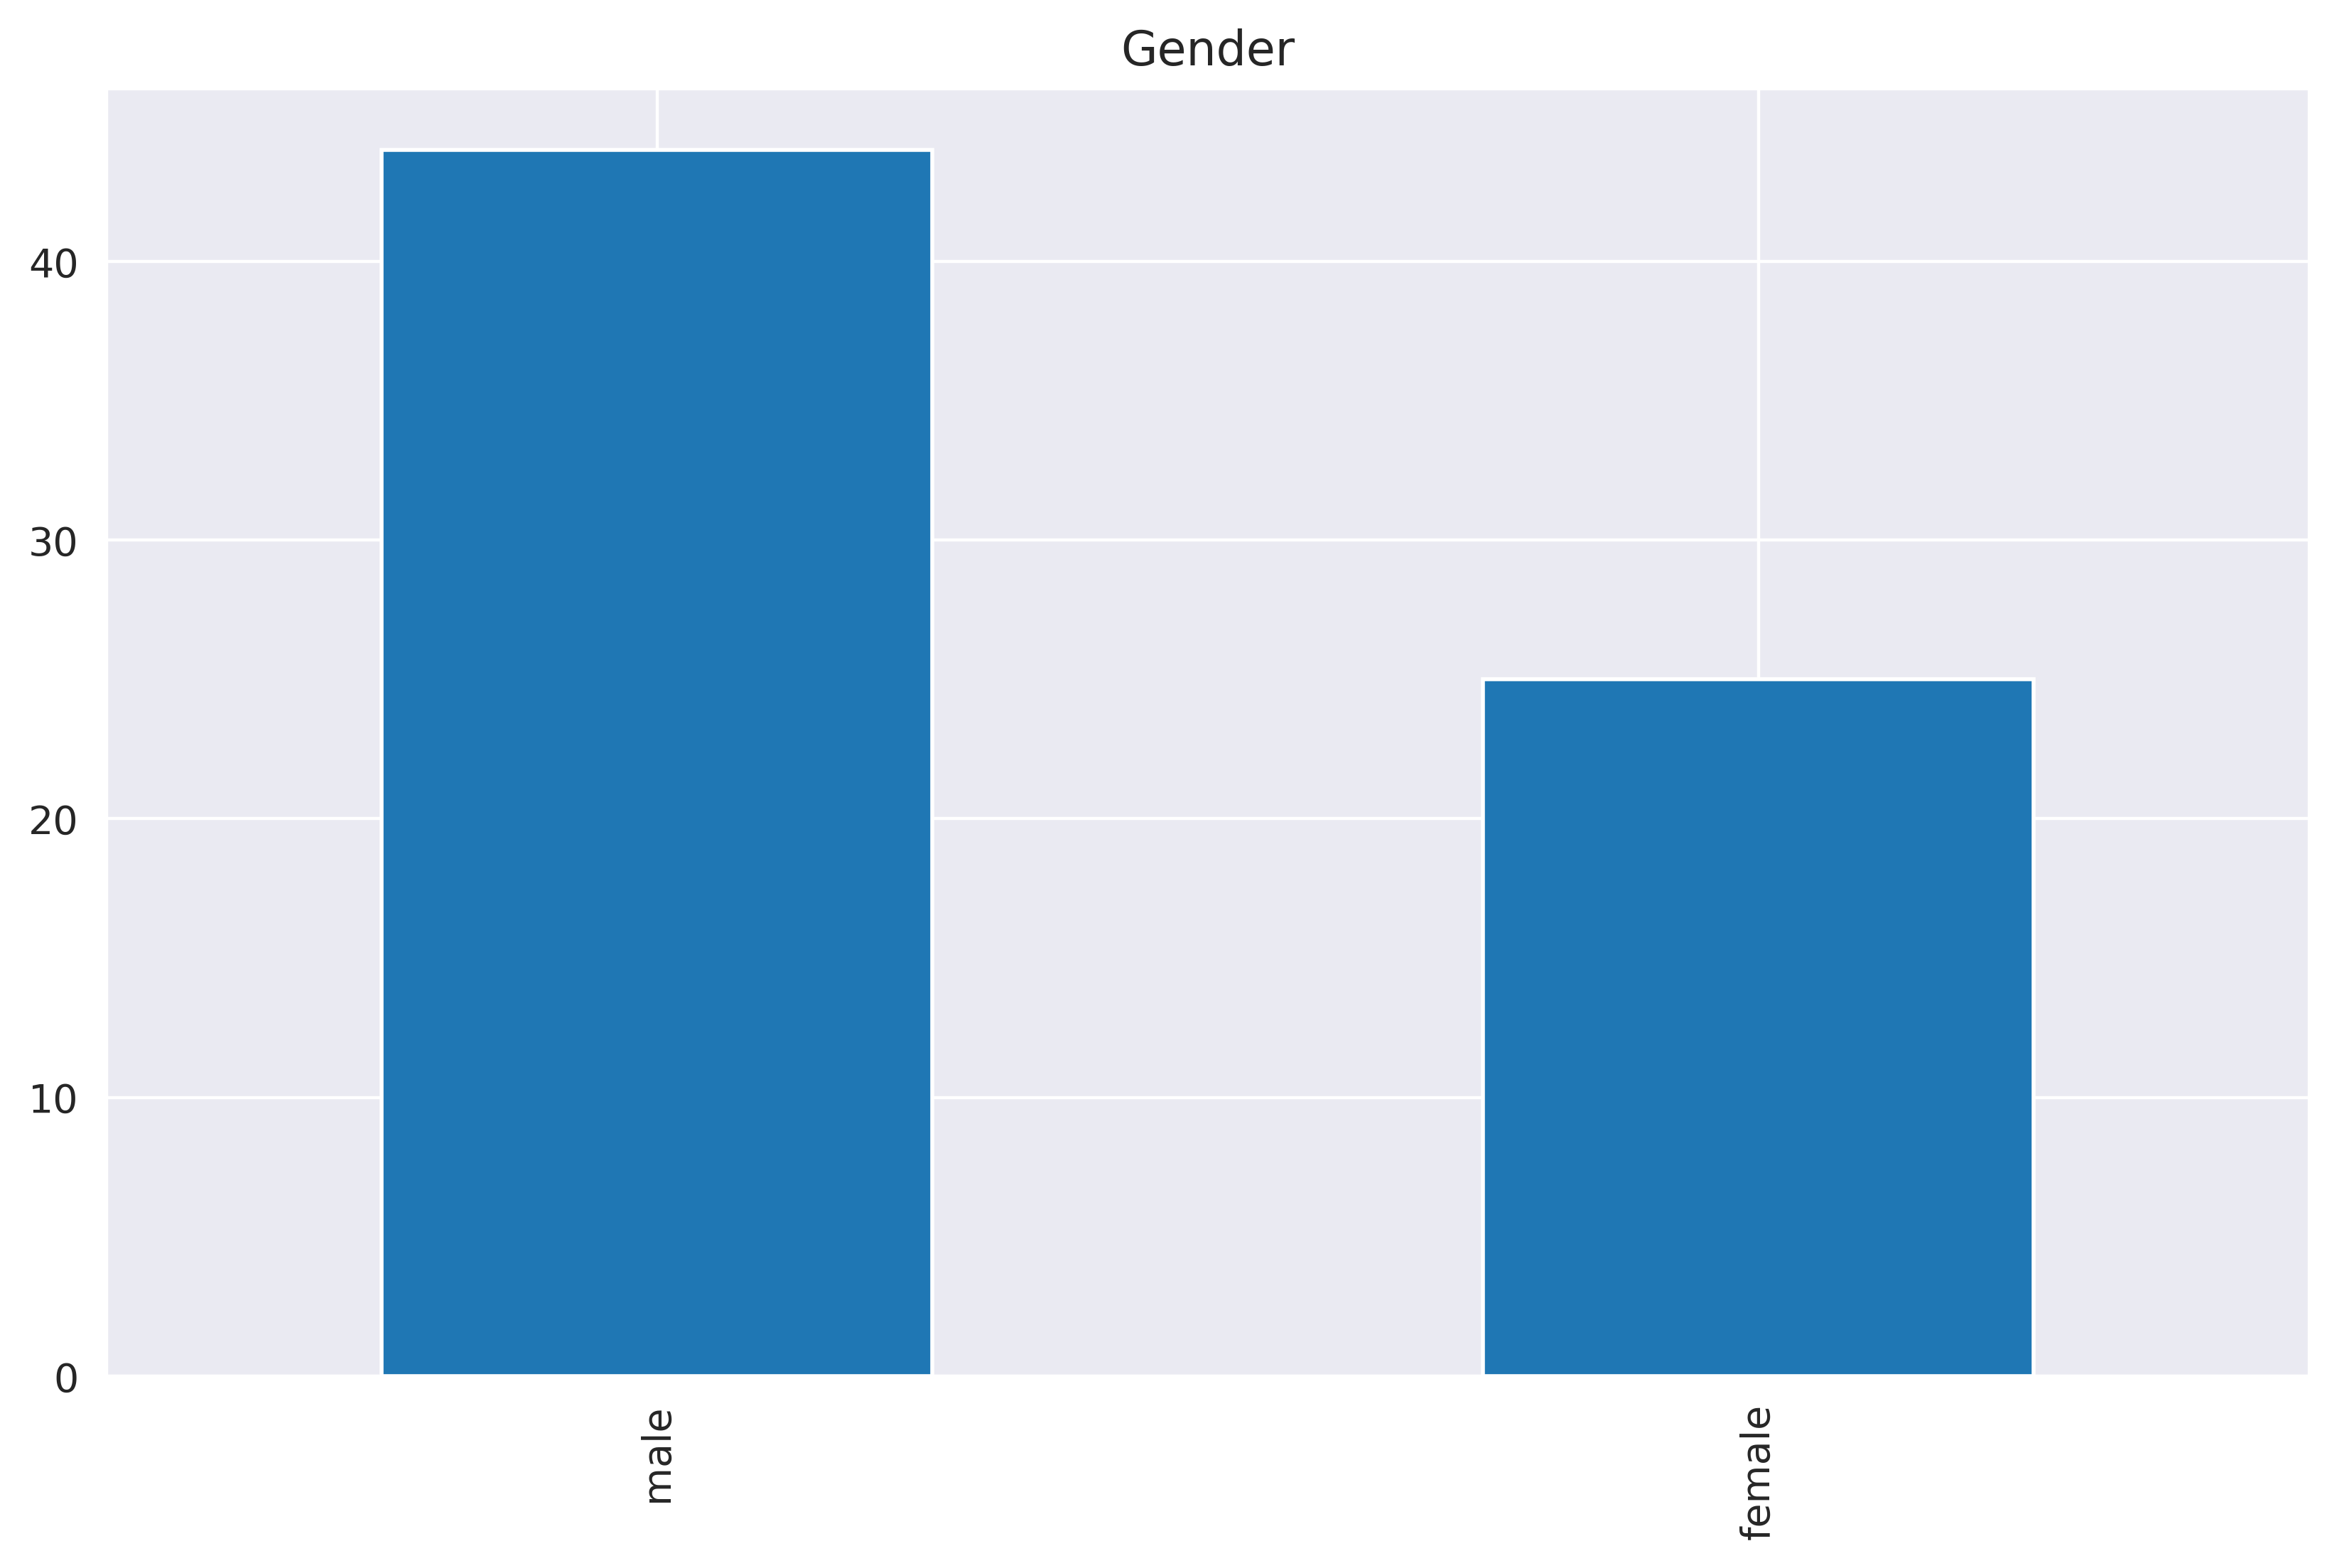

In [24]:
plt.figure(figsize=(10,6), dpi=200)
plt.title('Gender')
dead.gender.value_counts().plot.bar()
# a.value_counts() : a 안에 있는 벨류 값들의 수를 카운트 해줌

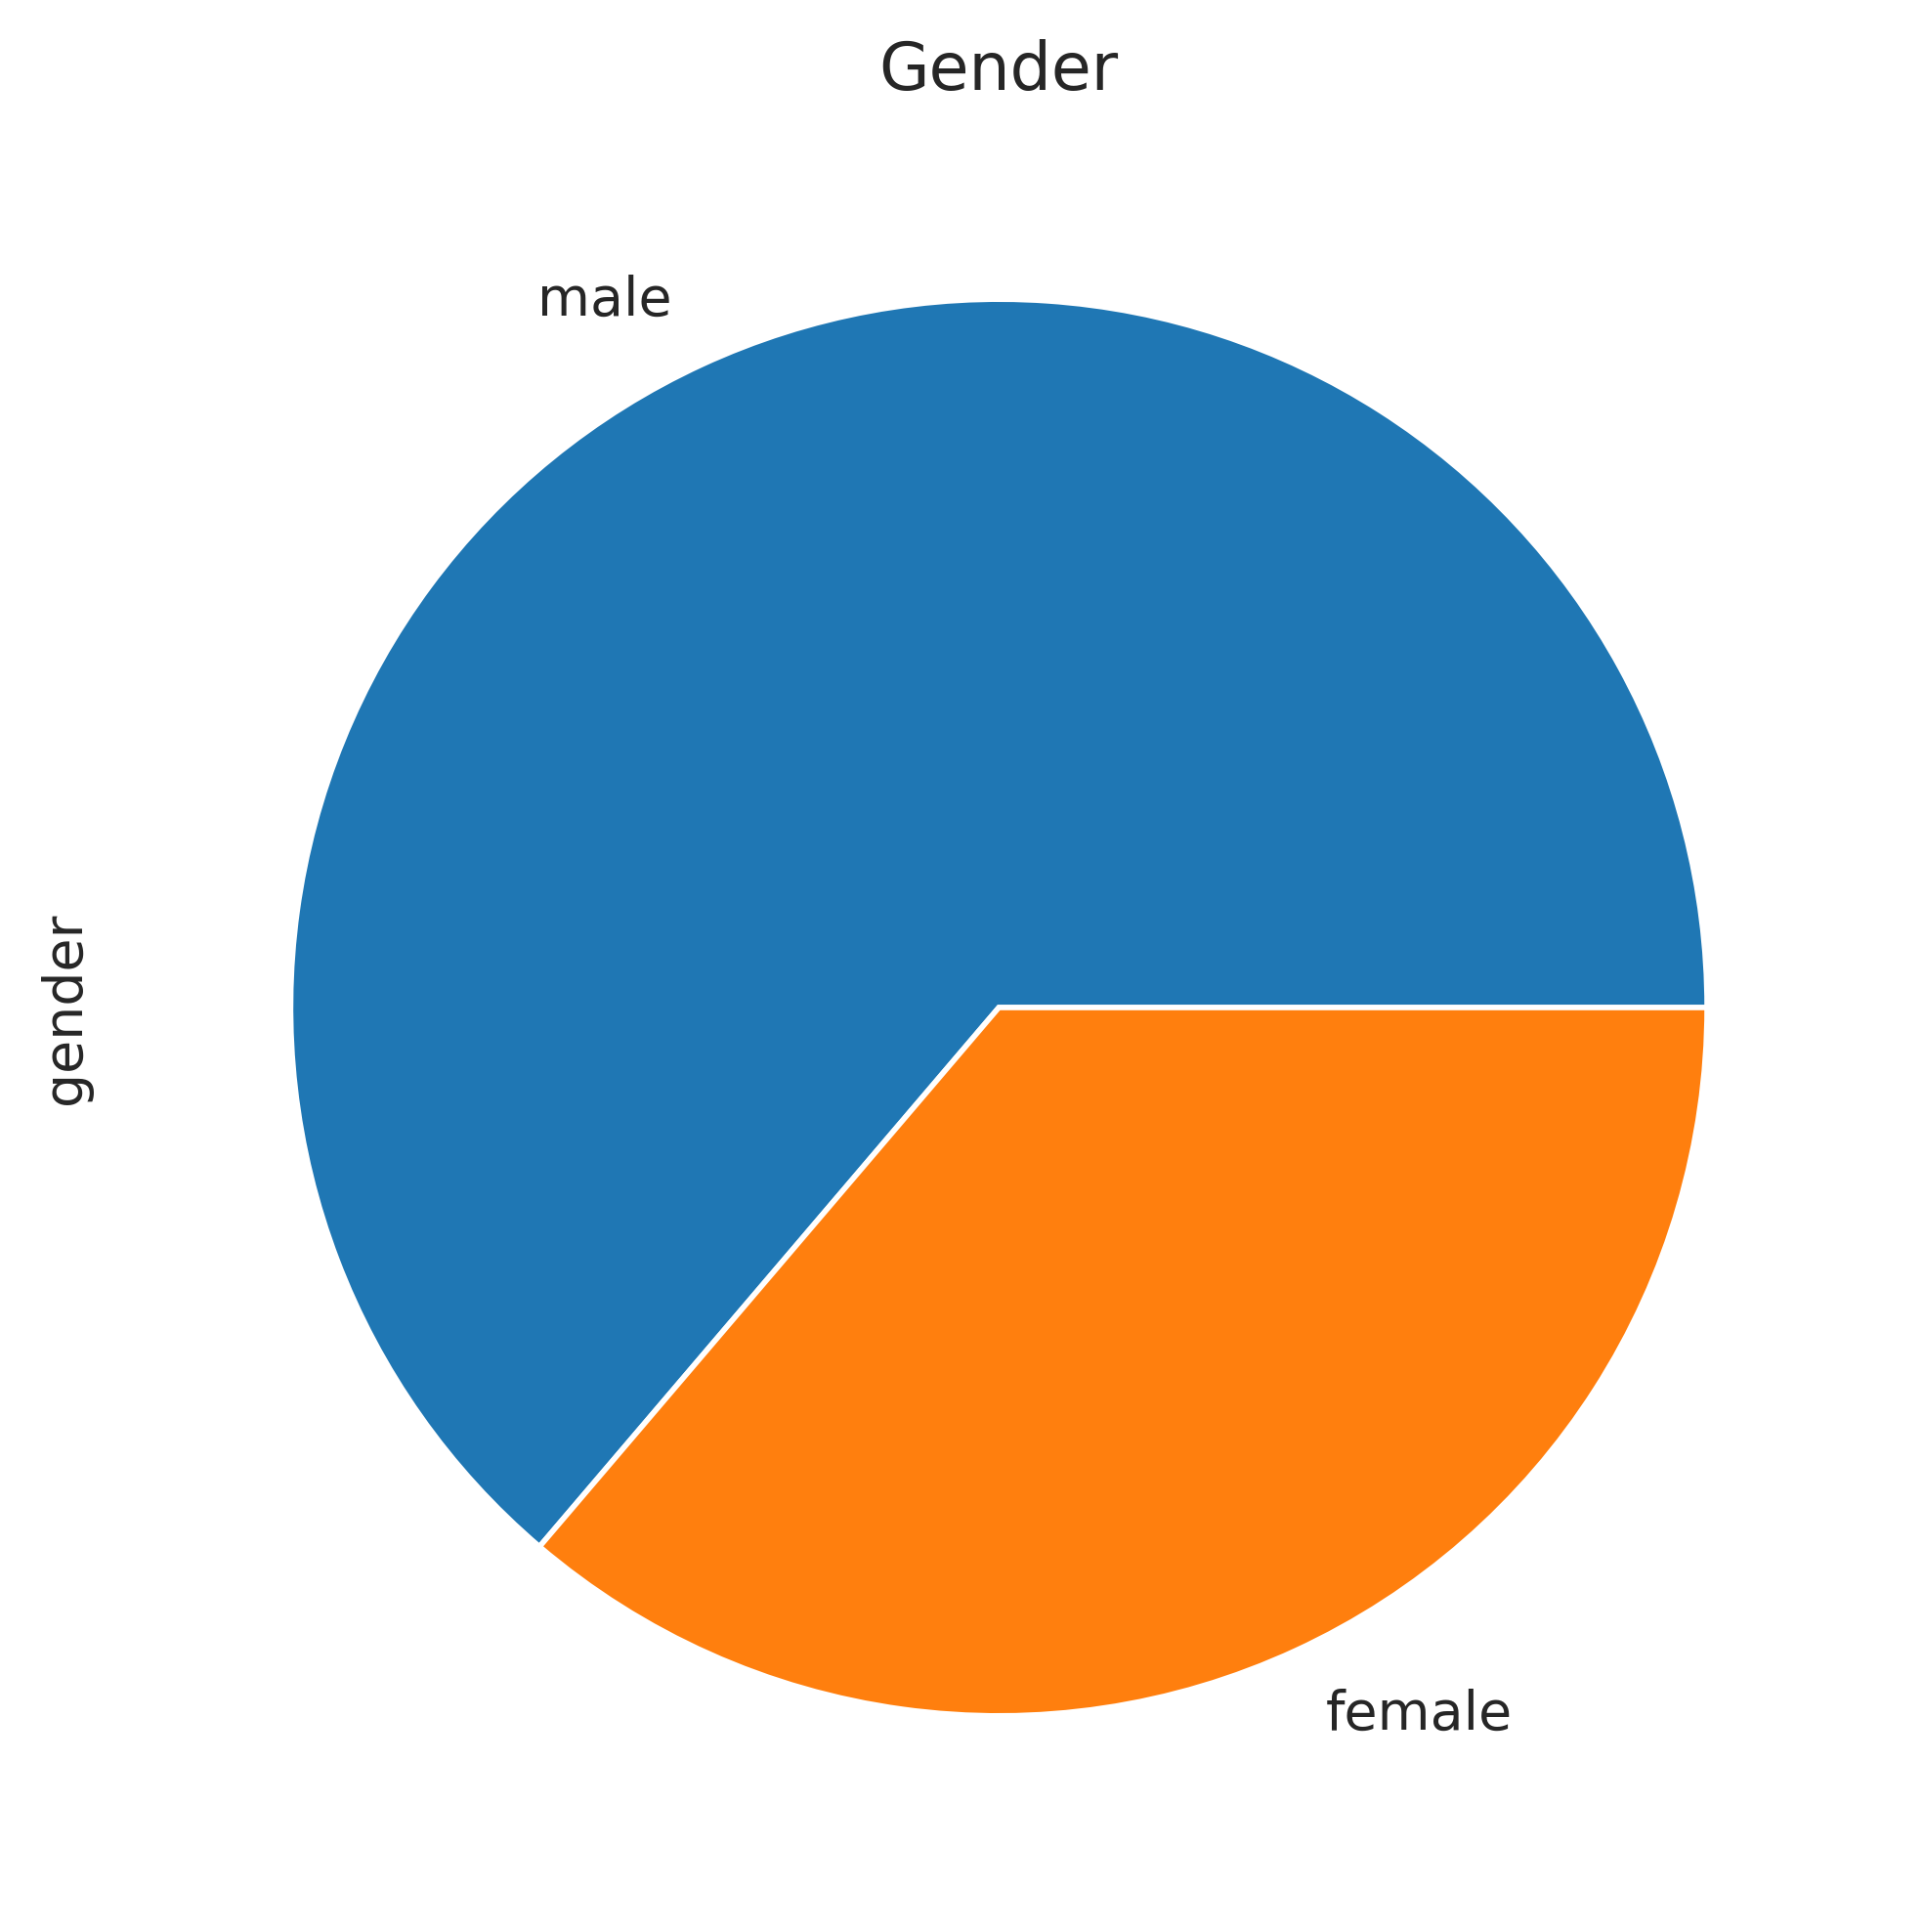

In [25]:
# pie 차트 그리기
plt.figure(figsize=(10,6), dpi=200)
plt.title('Gender')
dead.gender.value_counts().plot.pie() # bar를 pie로만 바꿔줌

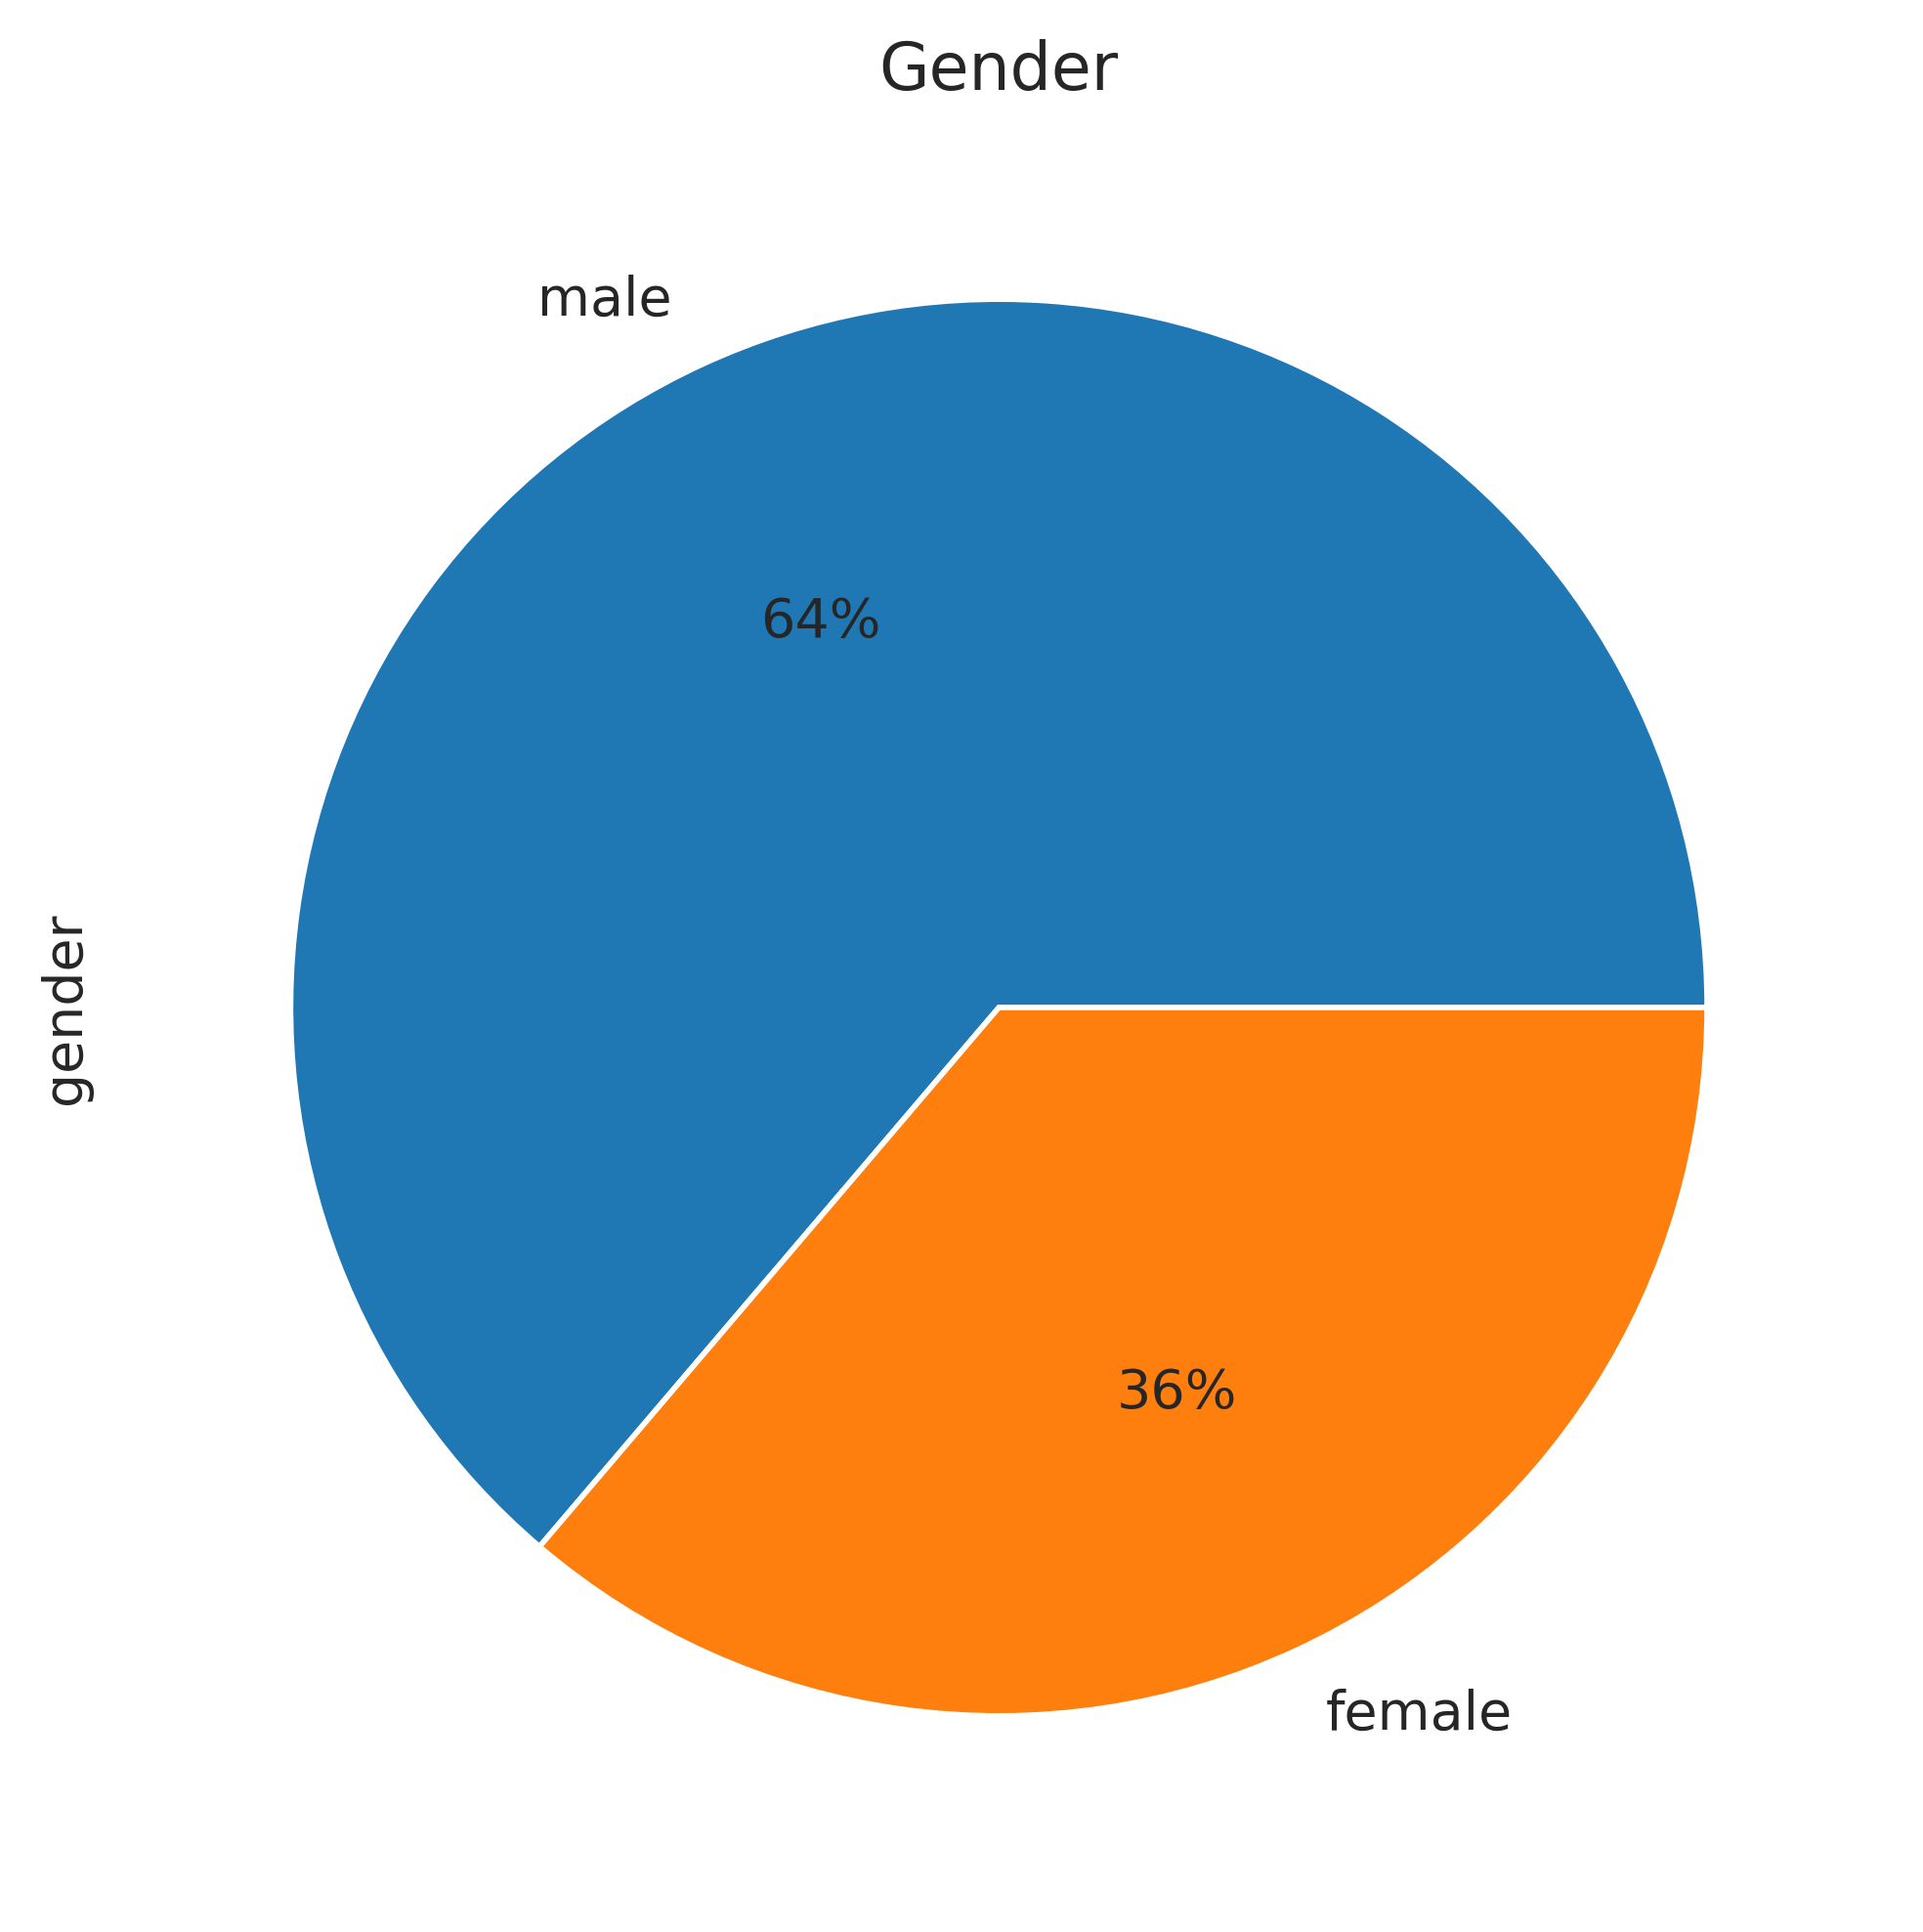

In [26]:
# 위 파이 차트에 퍼센트를 추가하기(autopct='%.nf%%)

plt.figure(figsize=(10,6), dpi=200)
plt.title('Gender')
dead.gender.value_counts().plot.pie(autopct='%.0f%%')

환자 유형별(격리해제자, 격리중인 환자, 사망자) 연령 분포

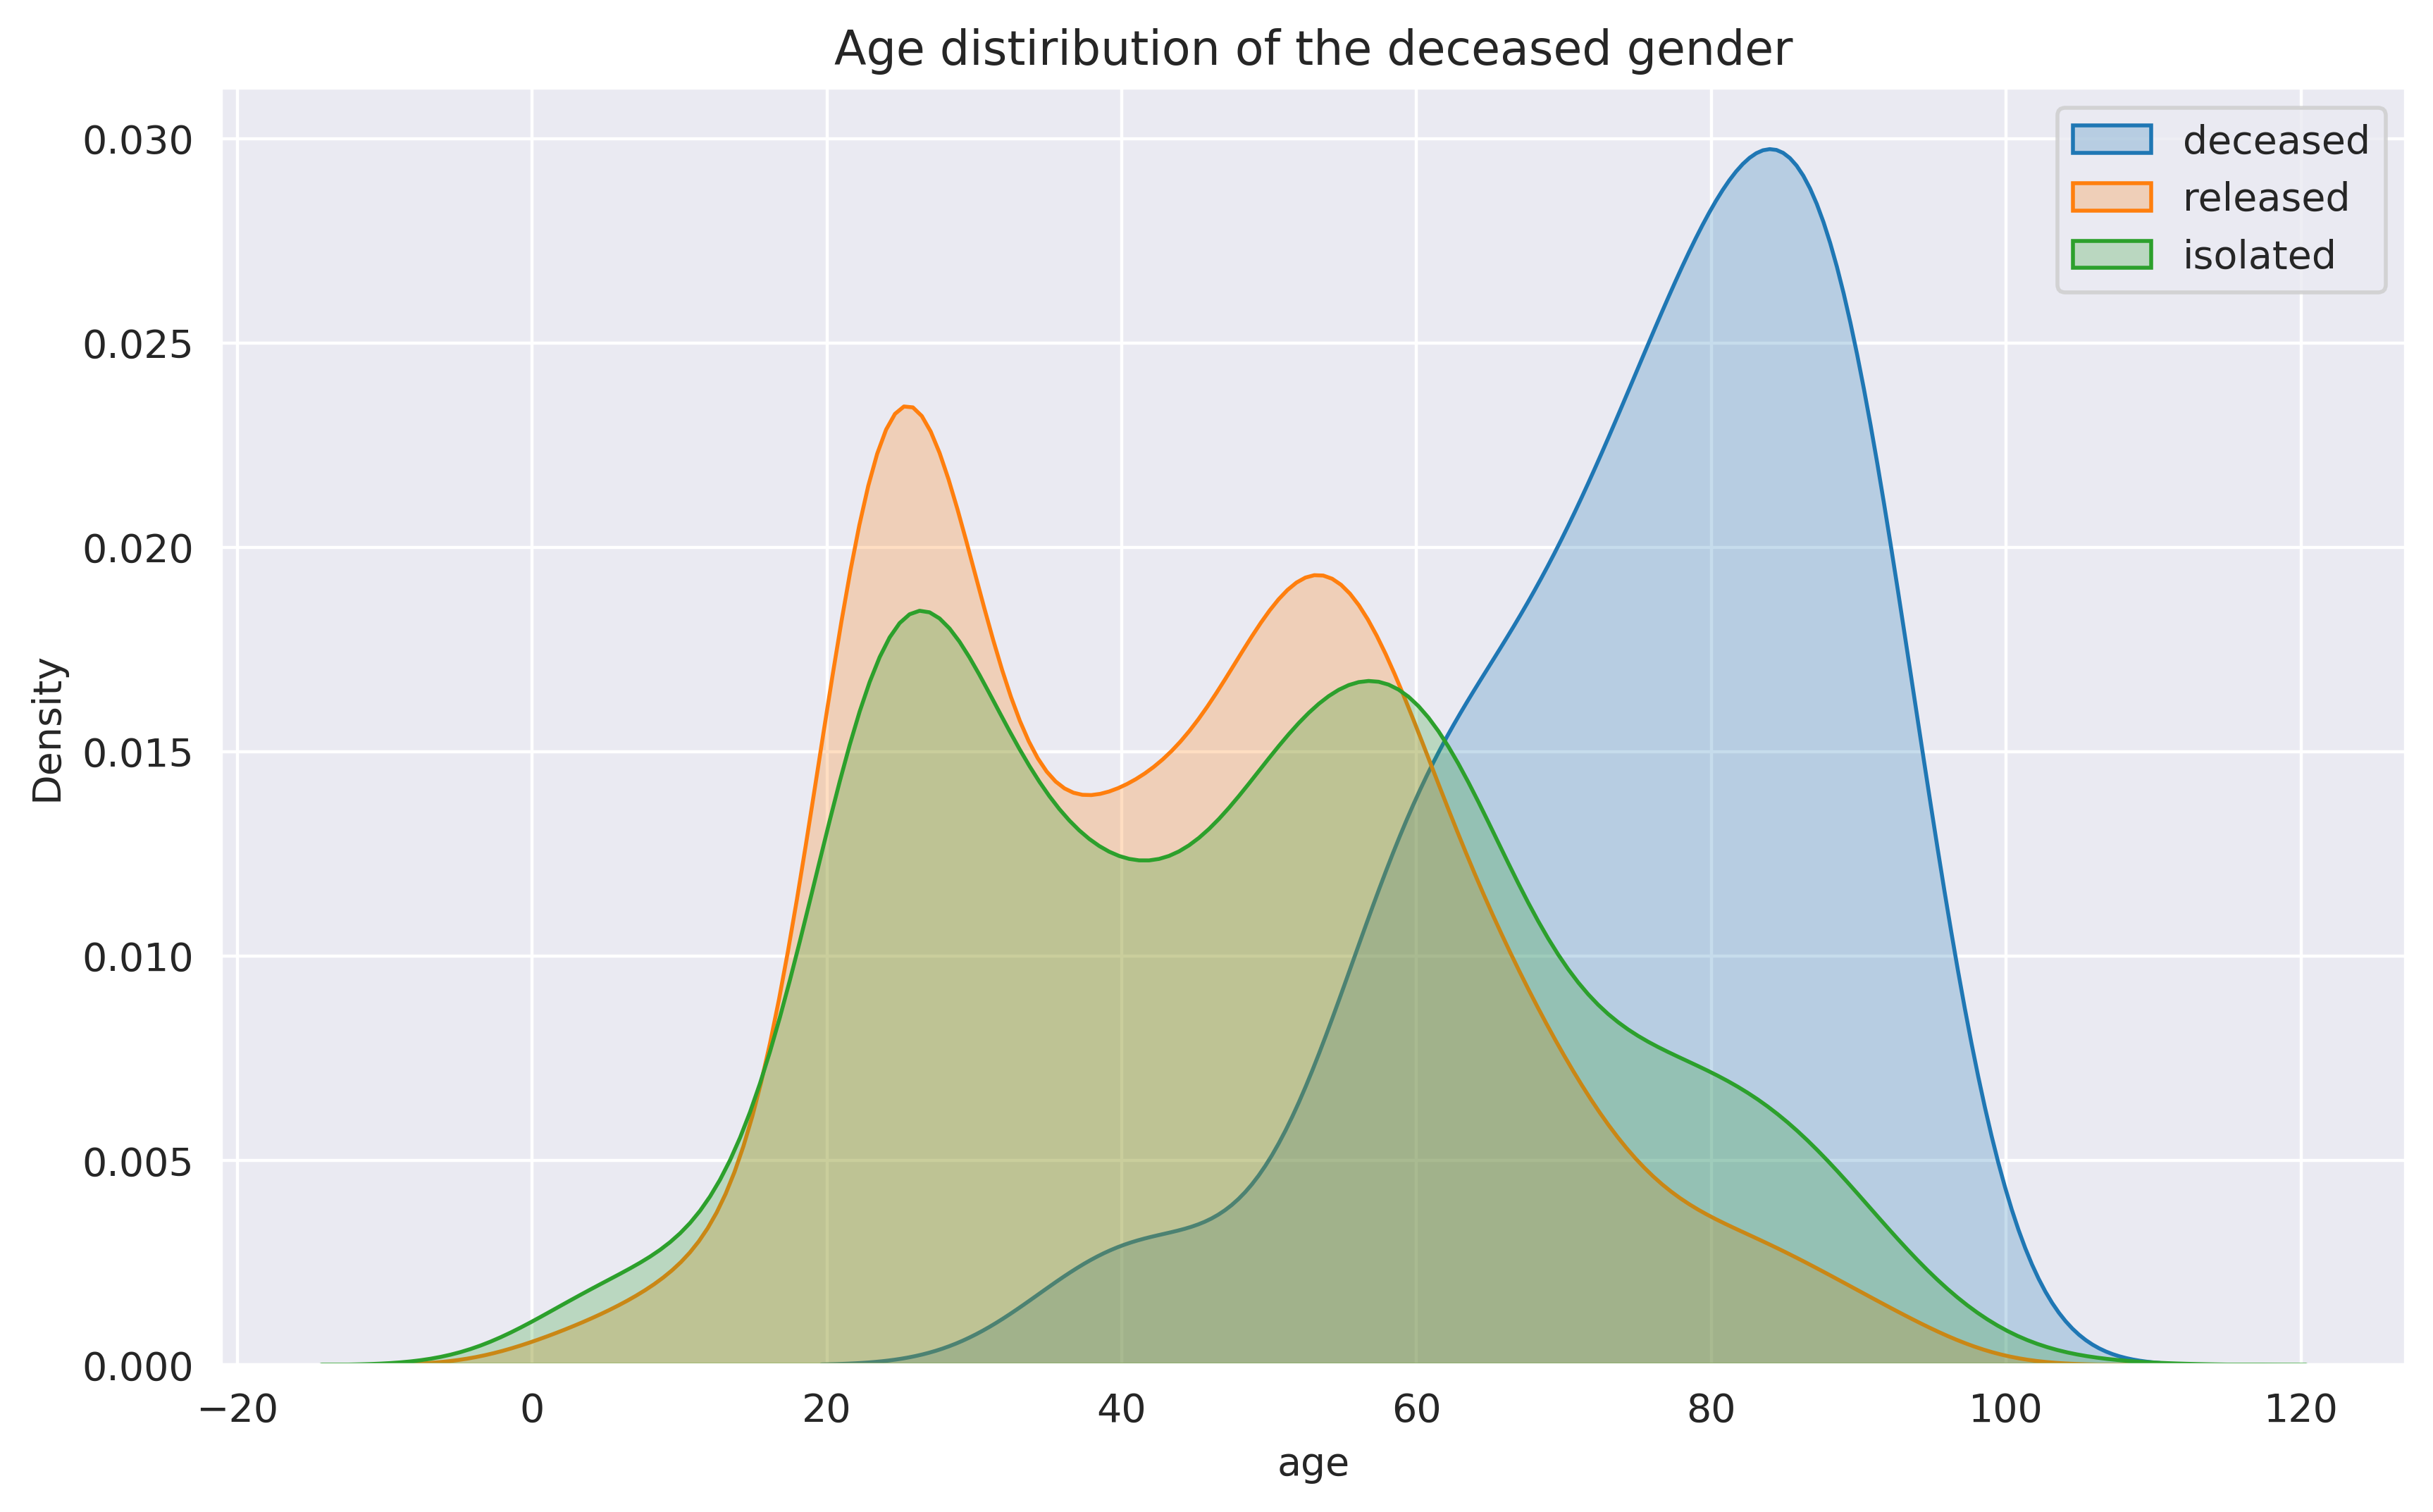

In [27]:
plt.figure(figsize=(10,6), dpi=200)
sns.set_style('darkgrid')
plt.title('Age distiribution of the deceased gender')
sns.kdeplot(data= dead['age'], label ='deceased', shade=True)
sns.kdeplot(data= released['age'],label = 'released', shade=True)
sns.kdeplot(data= isolated_state['age'],label = 'isolated', shade=True)
plt.legend()

환자 유형별 (격래해제자, 격리중, 사망) 비율 파이차트로 그려보기

In [28]:
isolated_patient = patient[patient.state == 'isolated']
deceased_patient = patient[patient.state == 'deceased']
released_patient = patient[patient.state == 'released']

In [29]:
isolated_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1433 entries, 14 to 3387
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1433 non-null   int64  
 1   global_num          997 non-null    float64
 2   gender              1375 non-null   object 
 3   birth_year          1257 non-null   float64
 4   age                 1257 non-null   float64
 5   country             1433 non-null   object 
 6   province            1433 non-null   object 
 7   city                1400 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1263 non-null   object 
 10  infection_order     2 non-null      float64
 11  infected_by         461 non-null    float64
 12  contact_number      184 non-null    float64
 13  symptom_onset_date  191 non-null    object 
 14  confirmed_date      1430 non-null   object 
 15  released_date       11 non-null     object 
 16  decea

In [30]:
deceased_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 108 to 3205
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          69 non-null     int64  
 1   global_num          59 non-null     float64
 2   gender              69 non-null     object 
 3   birth_year          64 non-null     float64
 4   age                 64 non-null     float64
 5   country             69 non-null     object 
 6   province            69 non-null     object 
 7   city                50 non-null     object 
 8   disease             18 non-null     object 
 9   infection_case      29 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      4 non-null      float64
 13  symptom_onset_date  6 non-null      object 
 14  confirmed_date      69 non-null     object 
 15  released_date       2 non-null      object 
 16  deceas

In [31]:
released_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 3382
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          1886 non-null   int64  
 1   global_num          1220 non-null   float64
 2   gender              1867 non-null   object 
 3   birth_year          1606 non-null   float64
 4   age                 1606 non-null   float64
 5   country             1886 non-null   object 
 6   province            1886 non-null   object 
 7   city                1859 non-null   object 
 8   disease             0 non-null      object 
 9   infection_case      1328 non-null   object 
 10  infection_order     29 non-null     float64
 11  infected_by         361 non-null    float64
 12  contact_number      455 non-null    float64
 13  symptom_onset_date  284 non-null    object 
 14  confirmed_date      1886 non-null   object 
 15  released_date       1314 non-null   object 
 16  deceas

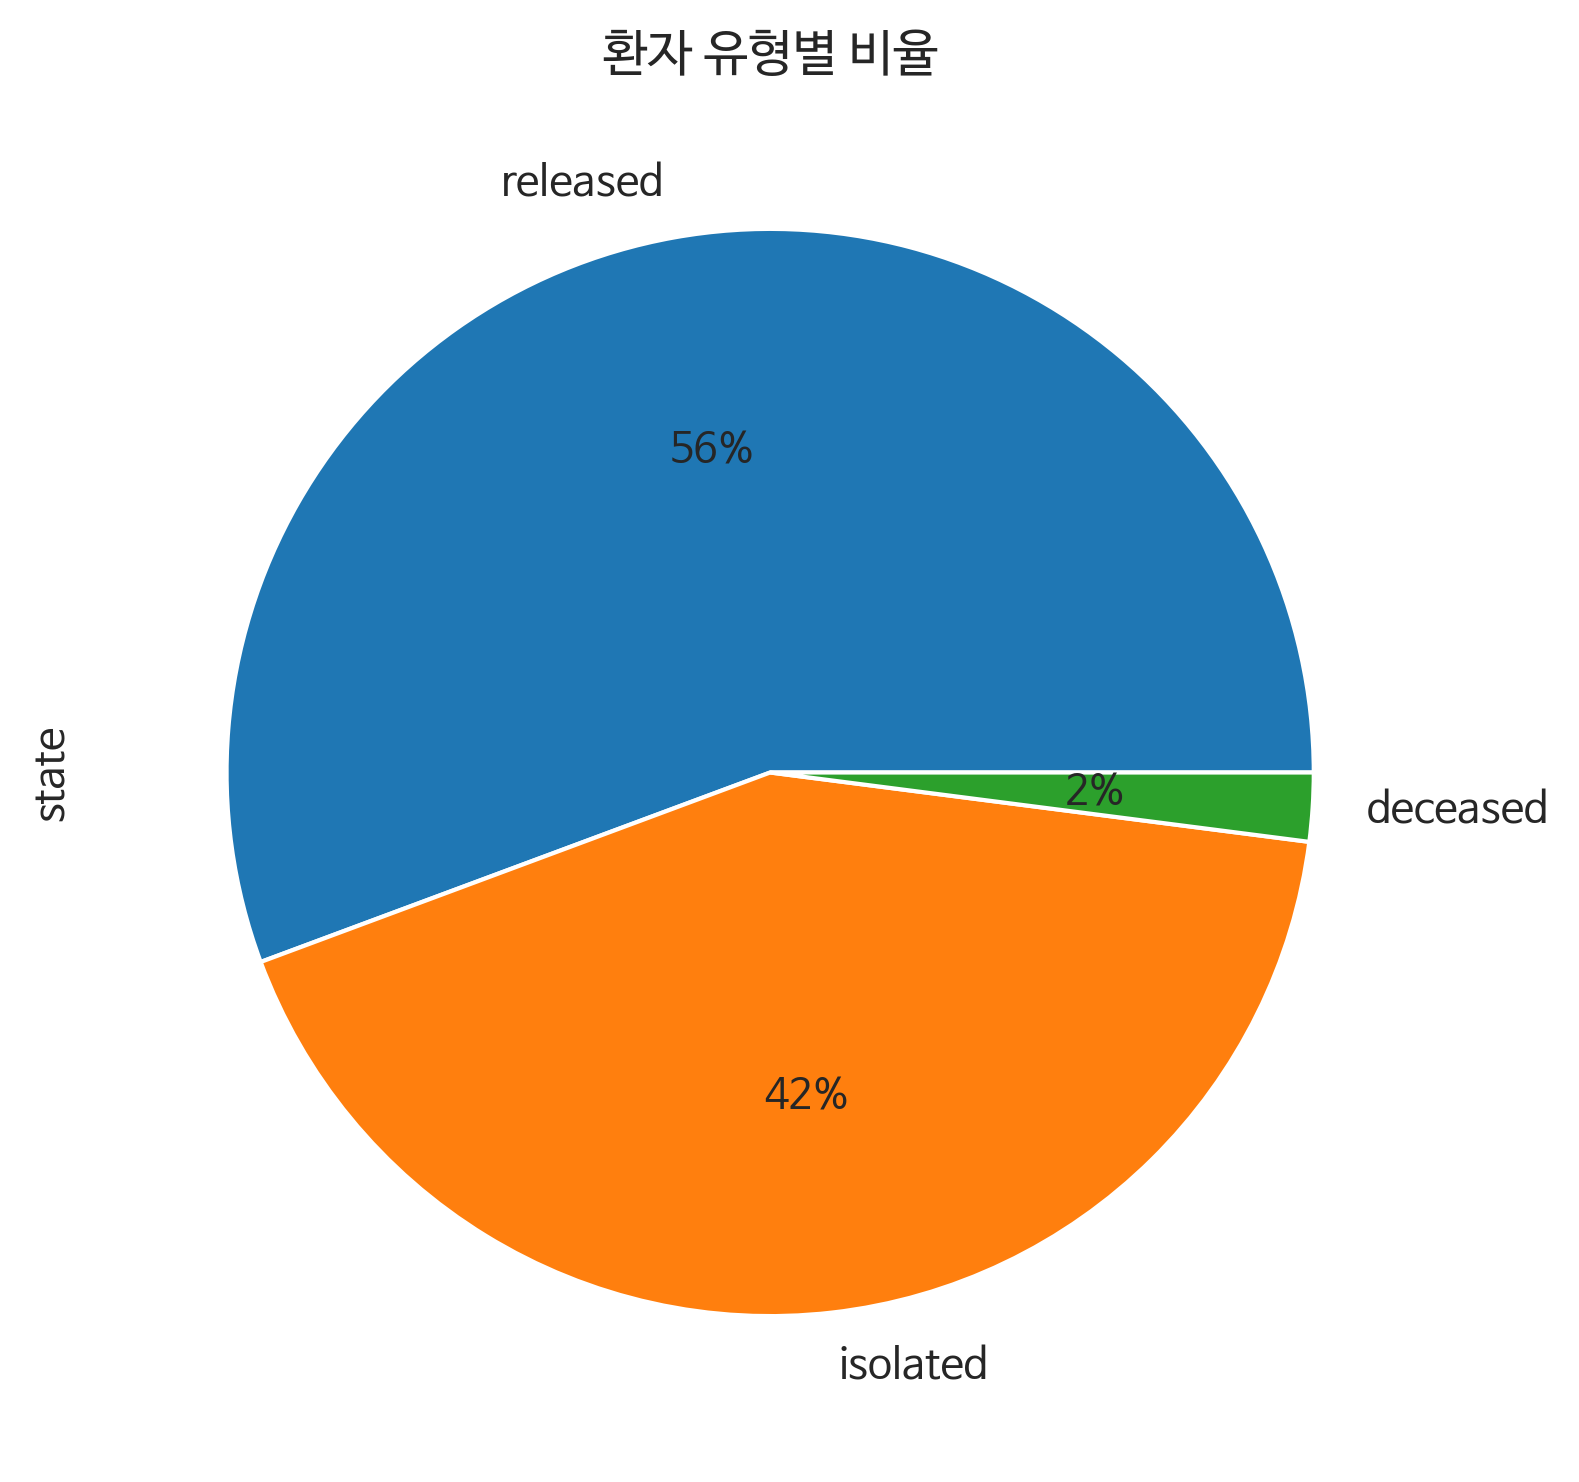

In [74]:
plt.figure(figsize=(10,6), dpi=150)
plt.title('환자 유형별 비율')
patient.state.value_counts().plot.pie(autopct='%.0f%%')

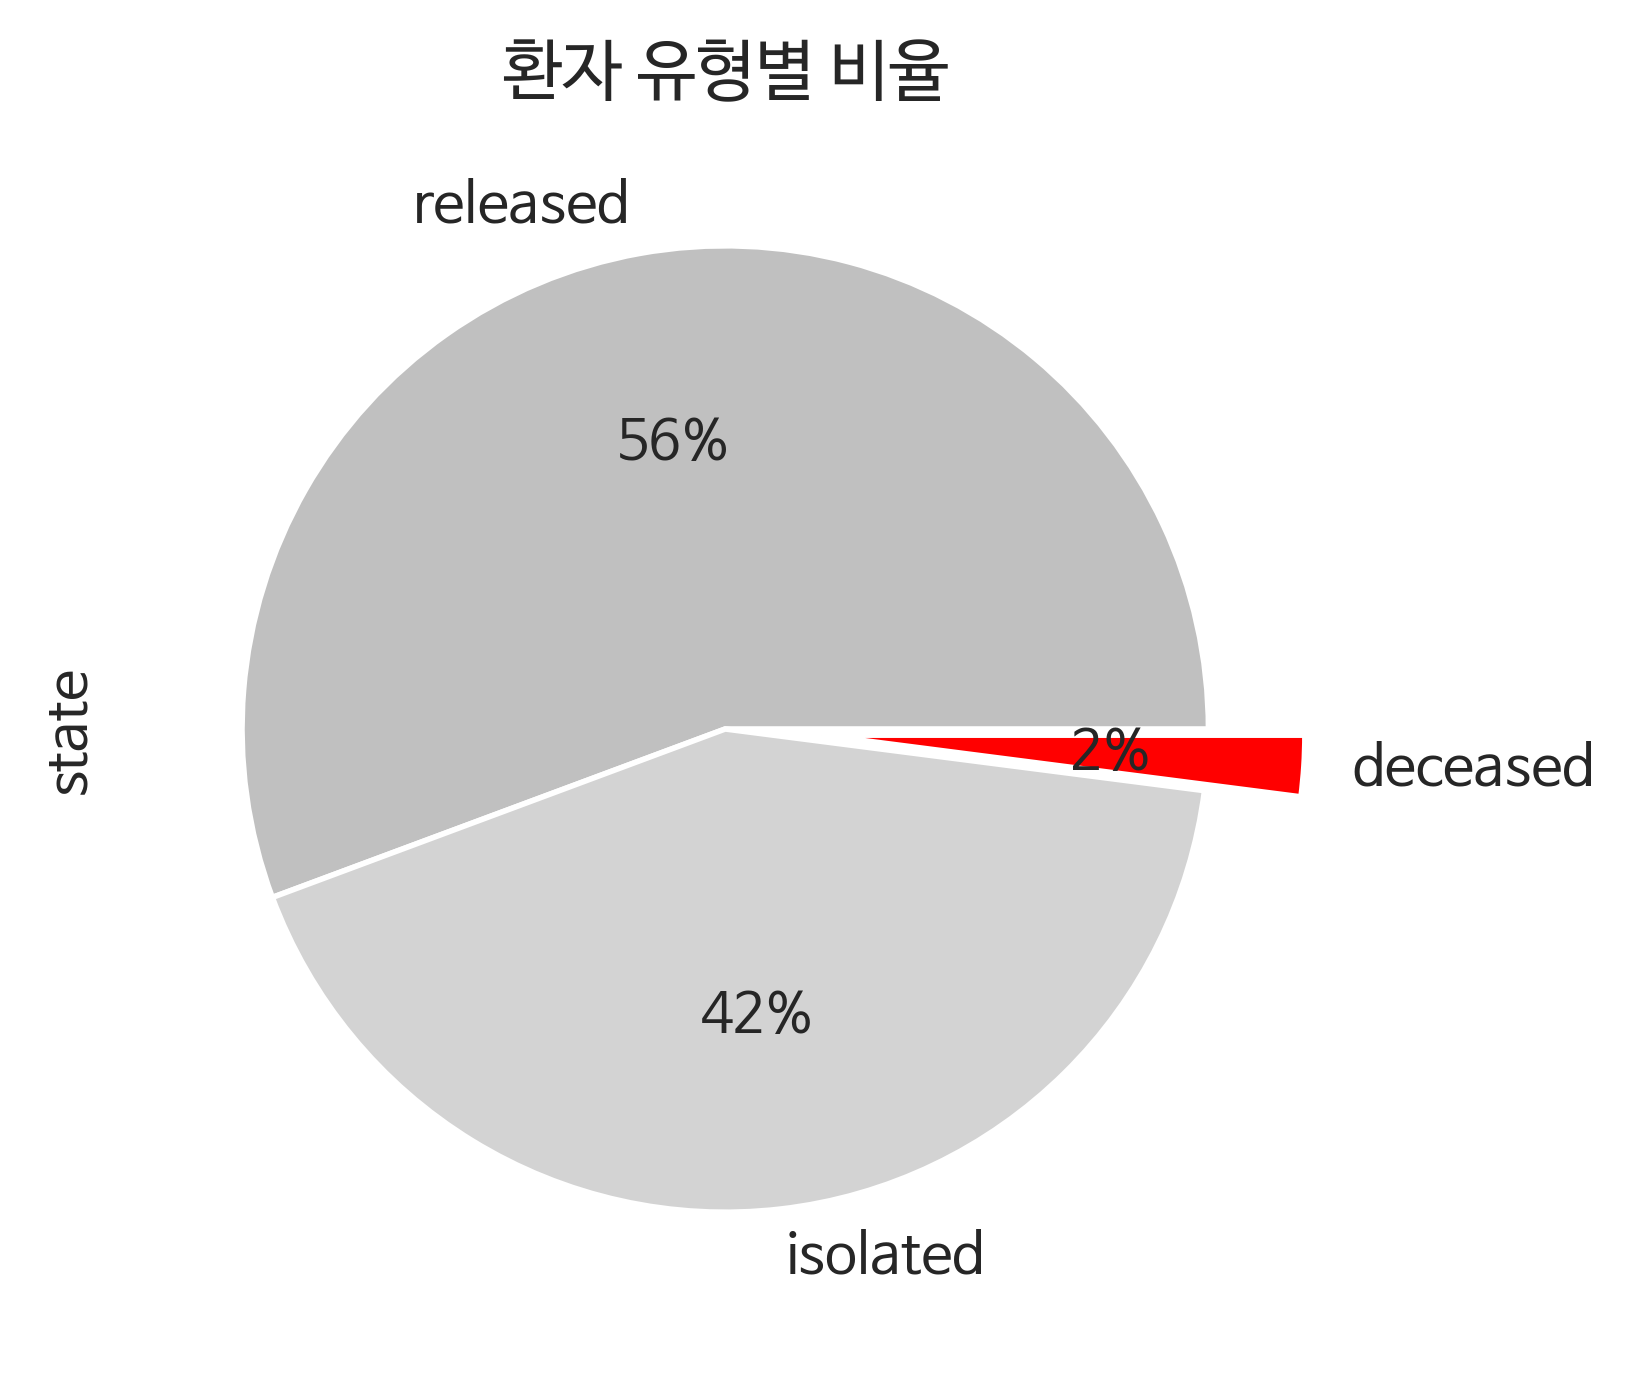

In [75]:
plt.figure(dpi=200)
plt.title('환자 유형별 비율')
explode = [0, 0, 0.2]
colors = ['silver', 'lightgray', 'red']
patient.state.value_counts().plot.pie(explode=explode, autopct='%.0f%%', colors=colors)

성별, 날짜별 사망자 수 꺾은선 그래프


In [72]:
male_date = male_dead.deceased_date
female_date= female_dead.deceased_date

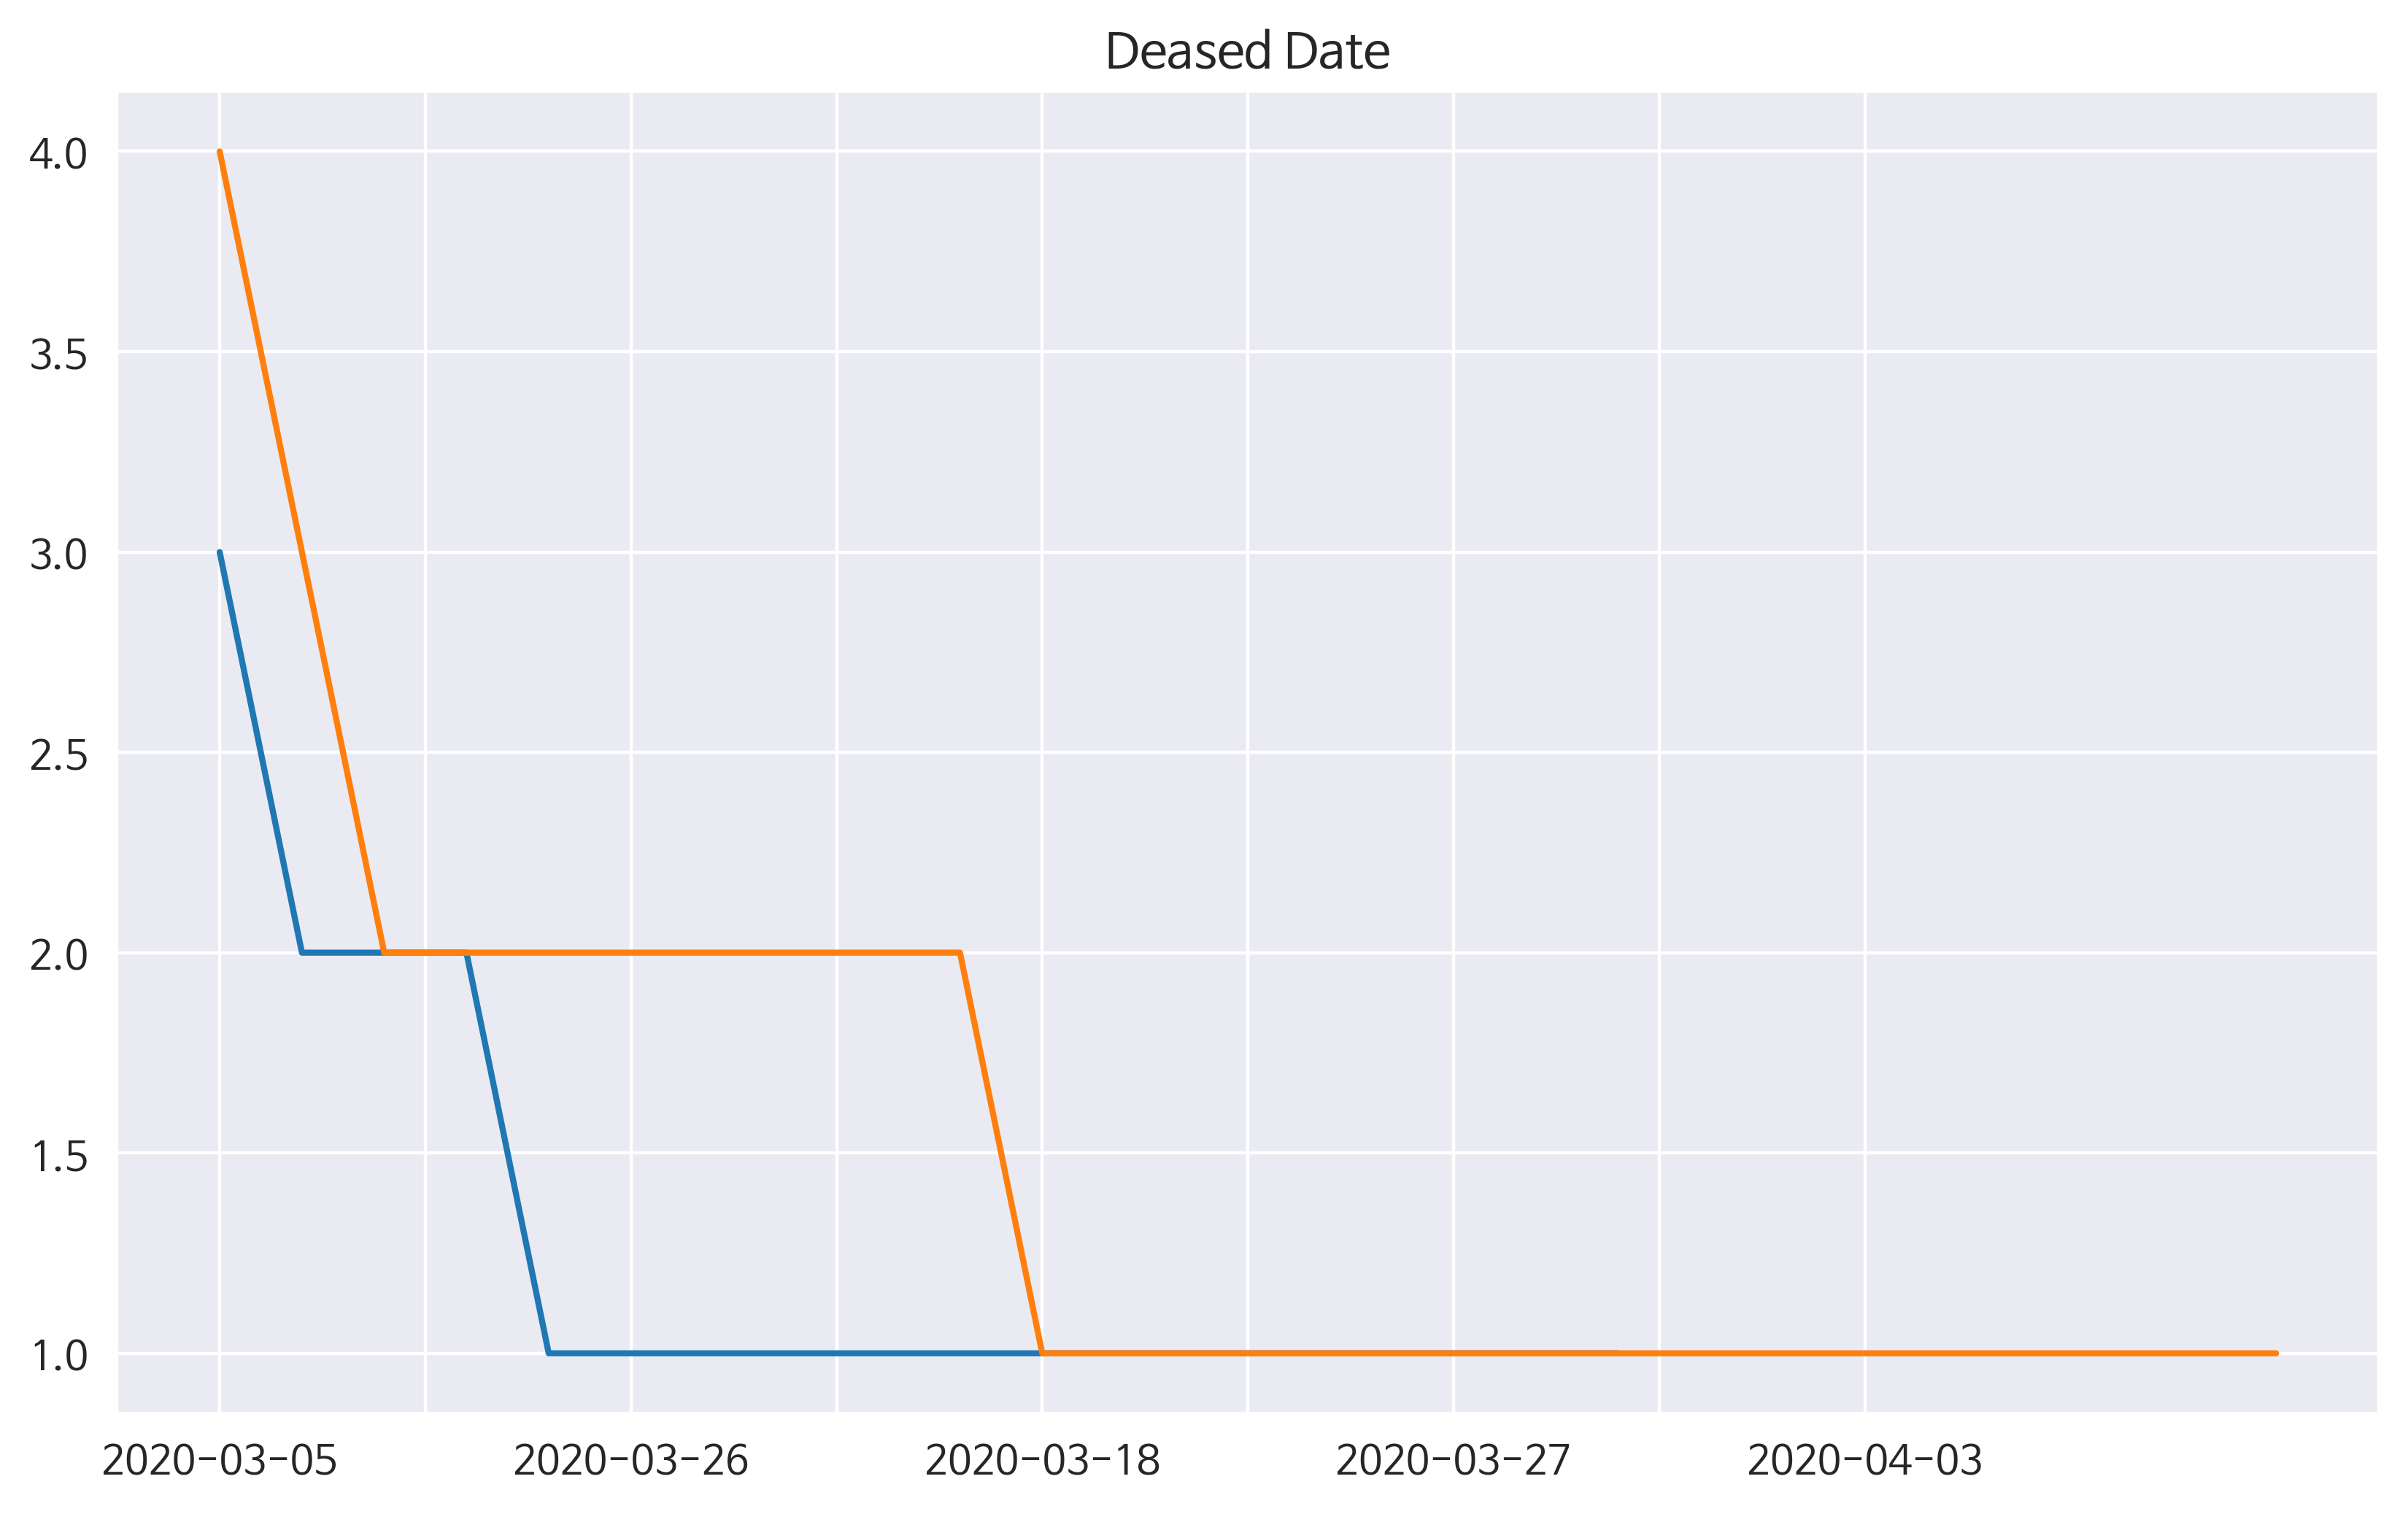

In [78]:
plt.figure(figsize=(10,6), dpi=200)
plt.title('Deased Date')
female_date.value_counts().plot()
male_date.value_counts().plot()

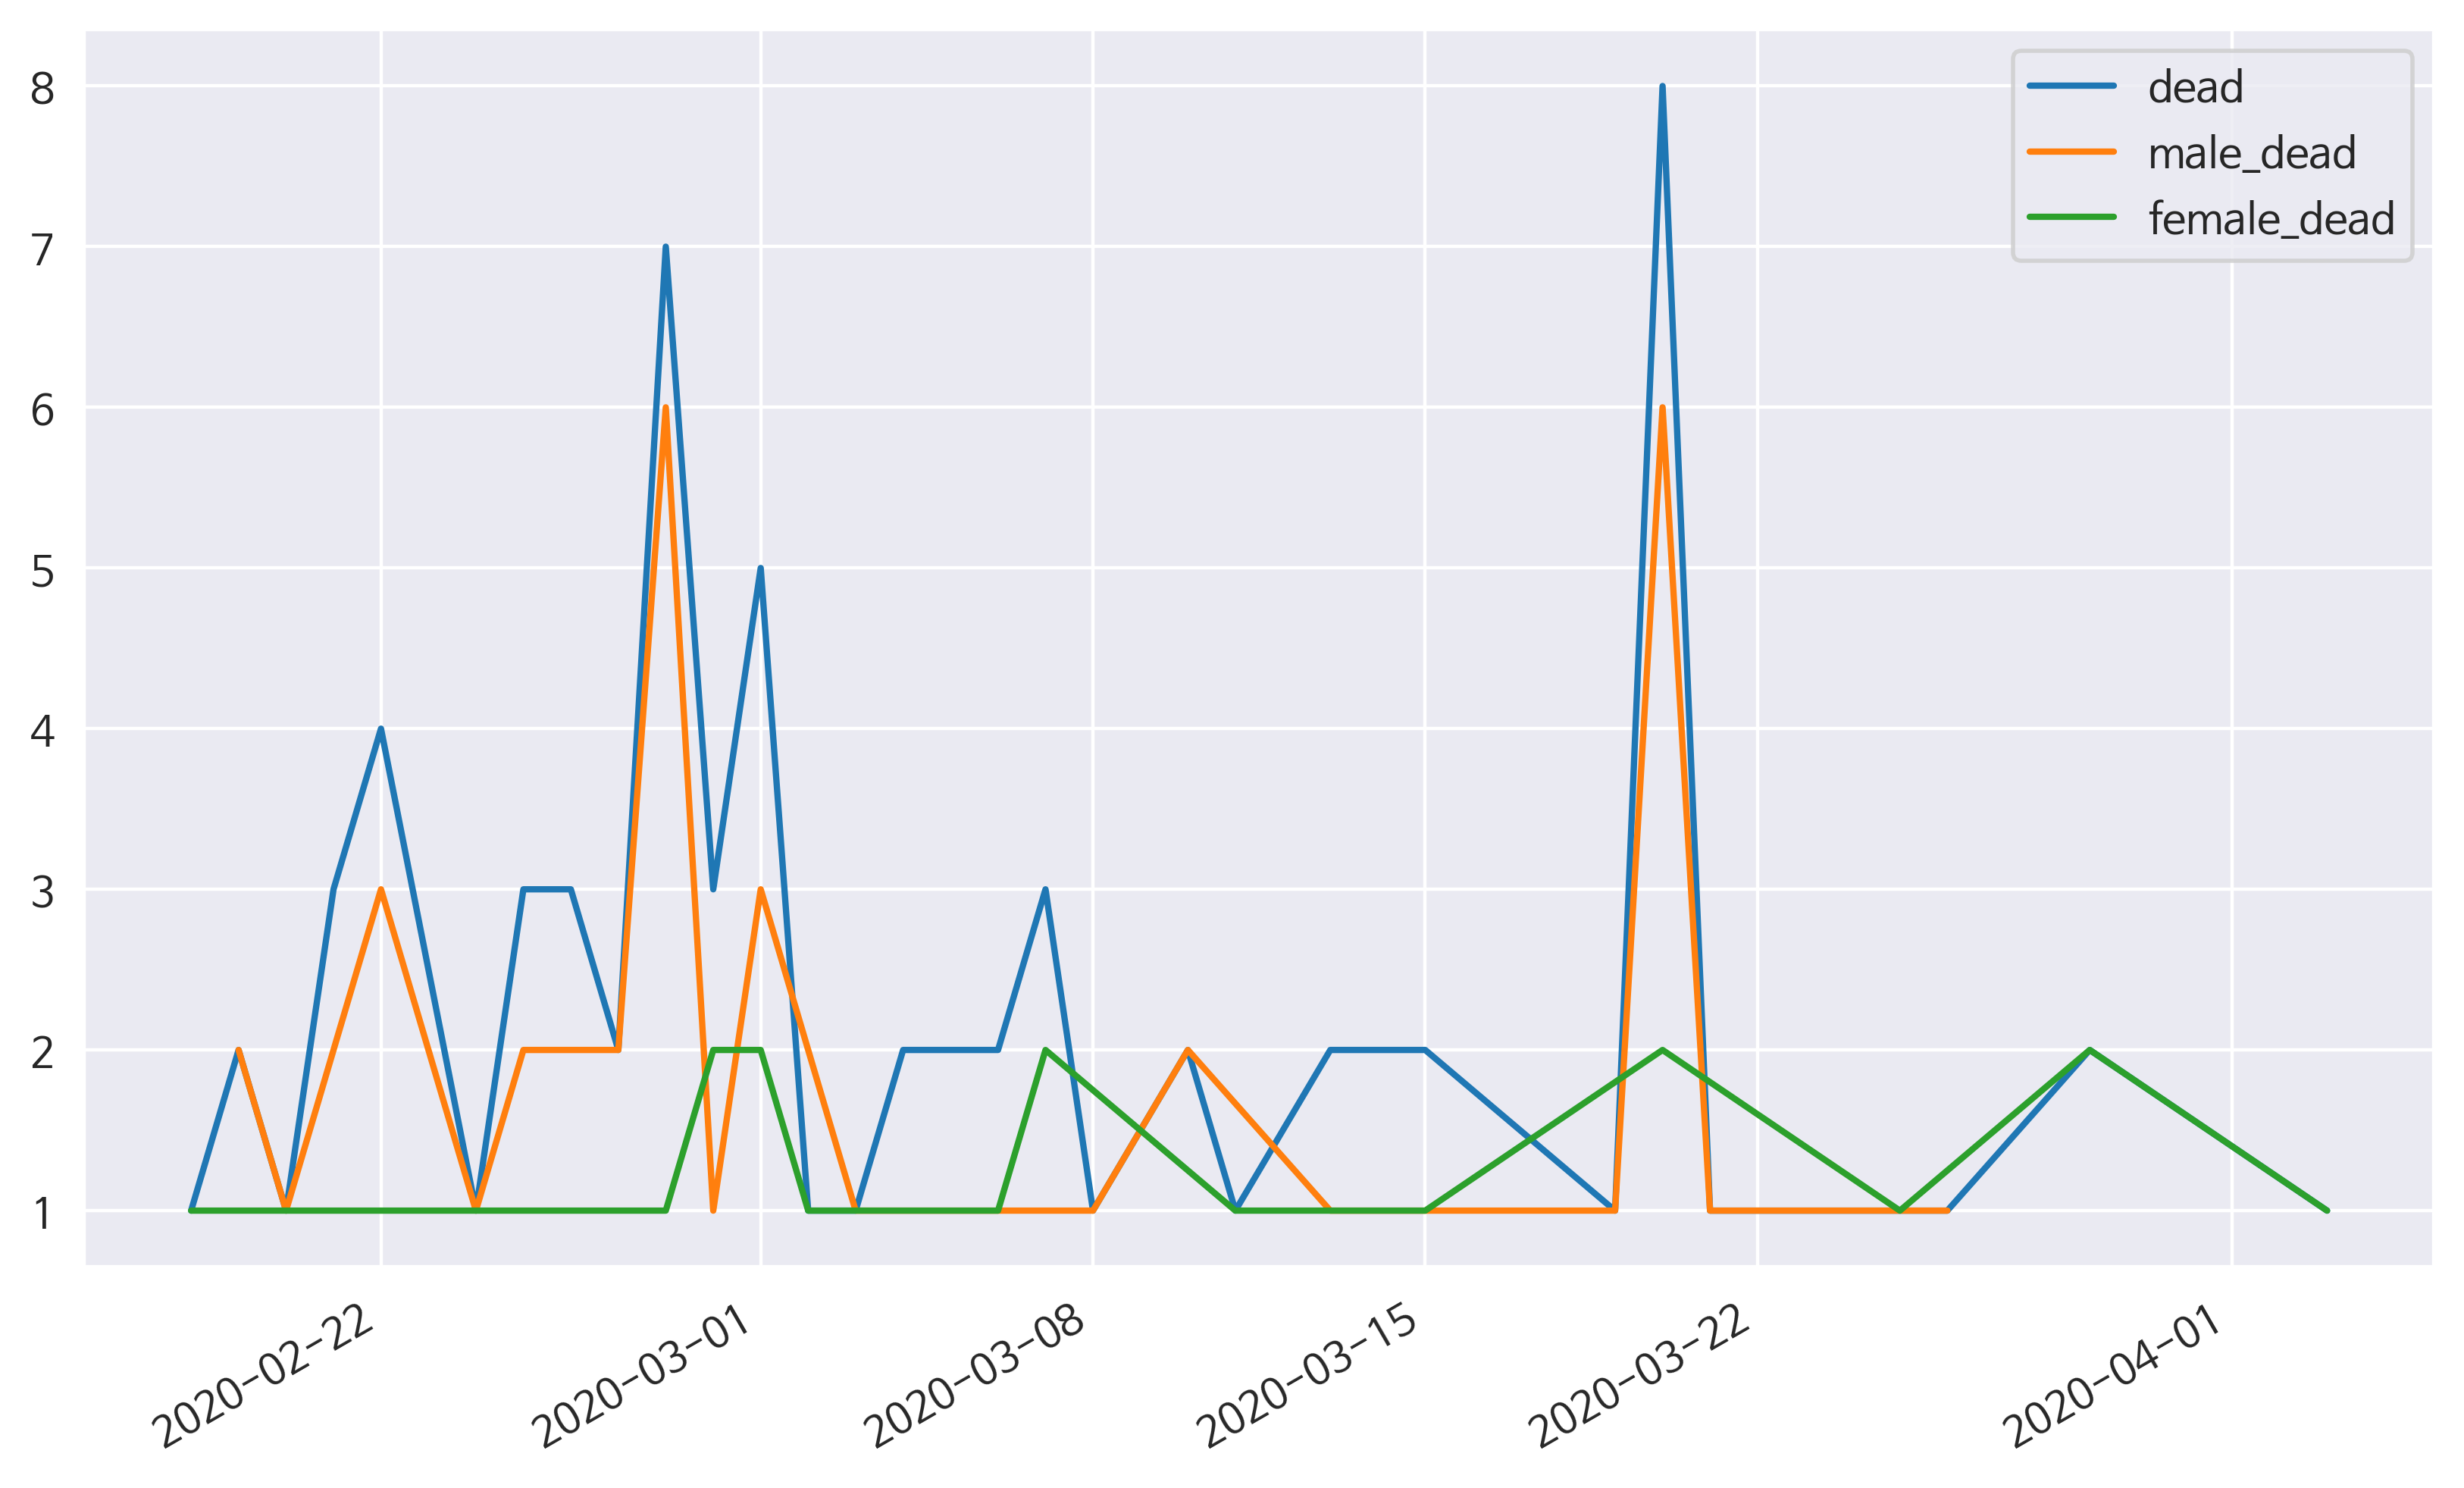

In [77]:
plt.figure(figsize=(10,6), dpi=200)
pd.to_datetime(dead.confirmed_date).value_counts().plot(label='dead')
pd.to_datetime(male_dead.confirmed_date).value_counts().plot(label='male_dead')
pd.to_datetime(female_dead.confirmed_date).value_counts().plot(label='female_dead')
plt.legend()